# Final Project

## Variables: stage and dischrage

## Sites: Main Street & waterlab

#  loading packs

In [78]:
#%pip install statsmodels

In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os as os
from scipy.stats.mstats import gmean #geometric mean function
import scipy as sc #scipy is new for us and holds many scientific methods
kde = sc.stats.gaussian_kde #renaming the gaussian_kde method as kde for ease of use.
##https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
##there is also a kde method within Scikit-learn as well.
from matplotlib import rcParams
import statsmodels.api as sm
from scipy.stats import gmean
from sklearn.linear_model import LinearRegression

# loading datas

In [80]:
# Loading data

# MainStreet station
df_MS1=pd.read_csv('MainStreet_Discharge.csv',sep=',',comment = '#',parse_dates=['LocalDateTime'], index_col='LocalDateTime', na_values = '-9999')
df_MS2=pd.read_csv('MainStreet_Stage.csv',sep=',',comment = '#',parse_dates=['LocalDateTime'], index_col='LocalDateTime', na_values = '-9999')

# WaterLab station
df_WL1=pd.read_csv('WaterLab_Discharge.csv',sep=',', comment = '#',parse_dates=['LocalDateTime'], index_col='LocalDateTime', na_values = '-9999')
df_WL2=pd.read_csv('WaterLab_Stage.csv',sep=',', comment = '#',parse_dates=['LocalDateTime'], index_col='LocalDateTime', na_values = '-9999')

/var/folders/xh/6f0lgvxn3z39lslpv0q32r0h0000gn/T/ipykernel_97802/1382776897.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_MS2=pd.read_csv('MainStreet_Stage.csv',sep=',',comment = '#',parse_dates=['LocalDateTime'], index_col='LocalDateTime', na_values = '-9999')


# Setting Font

In [81]:
# Set the font globally to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Arial']

myfont='Arial'

# 1.1: Satge vs Discharge

In [82]:
print(len(df_MS1), len(df_MS2))
print(len(df_WL1), len(df_WL2))

335943 335942
336466 336471


In [83]:
 df_MS1 = df_MS1[:-1]  # Removes the last element from df_MS1
 df_WL2 = df_WL2[:-5]  # Removes the 5 element from df_WL2

Text(0, 0.5, 'Stage (cm)')

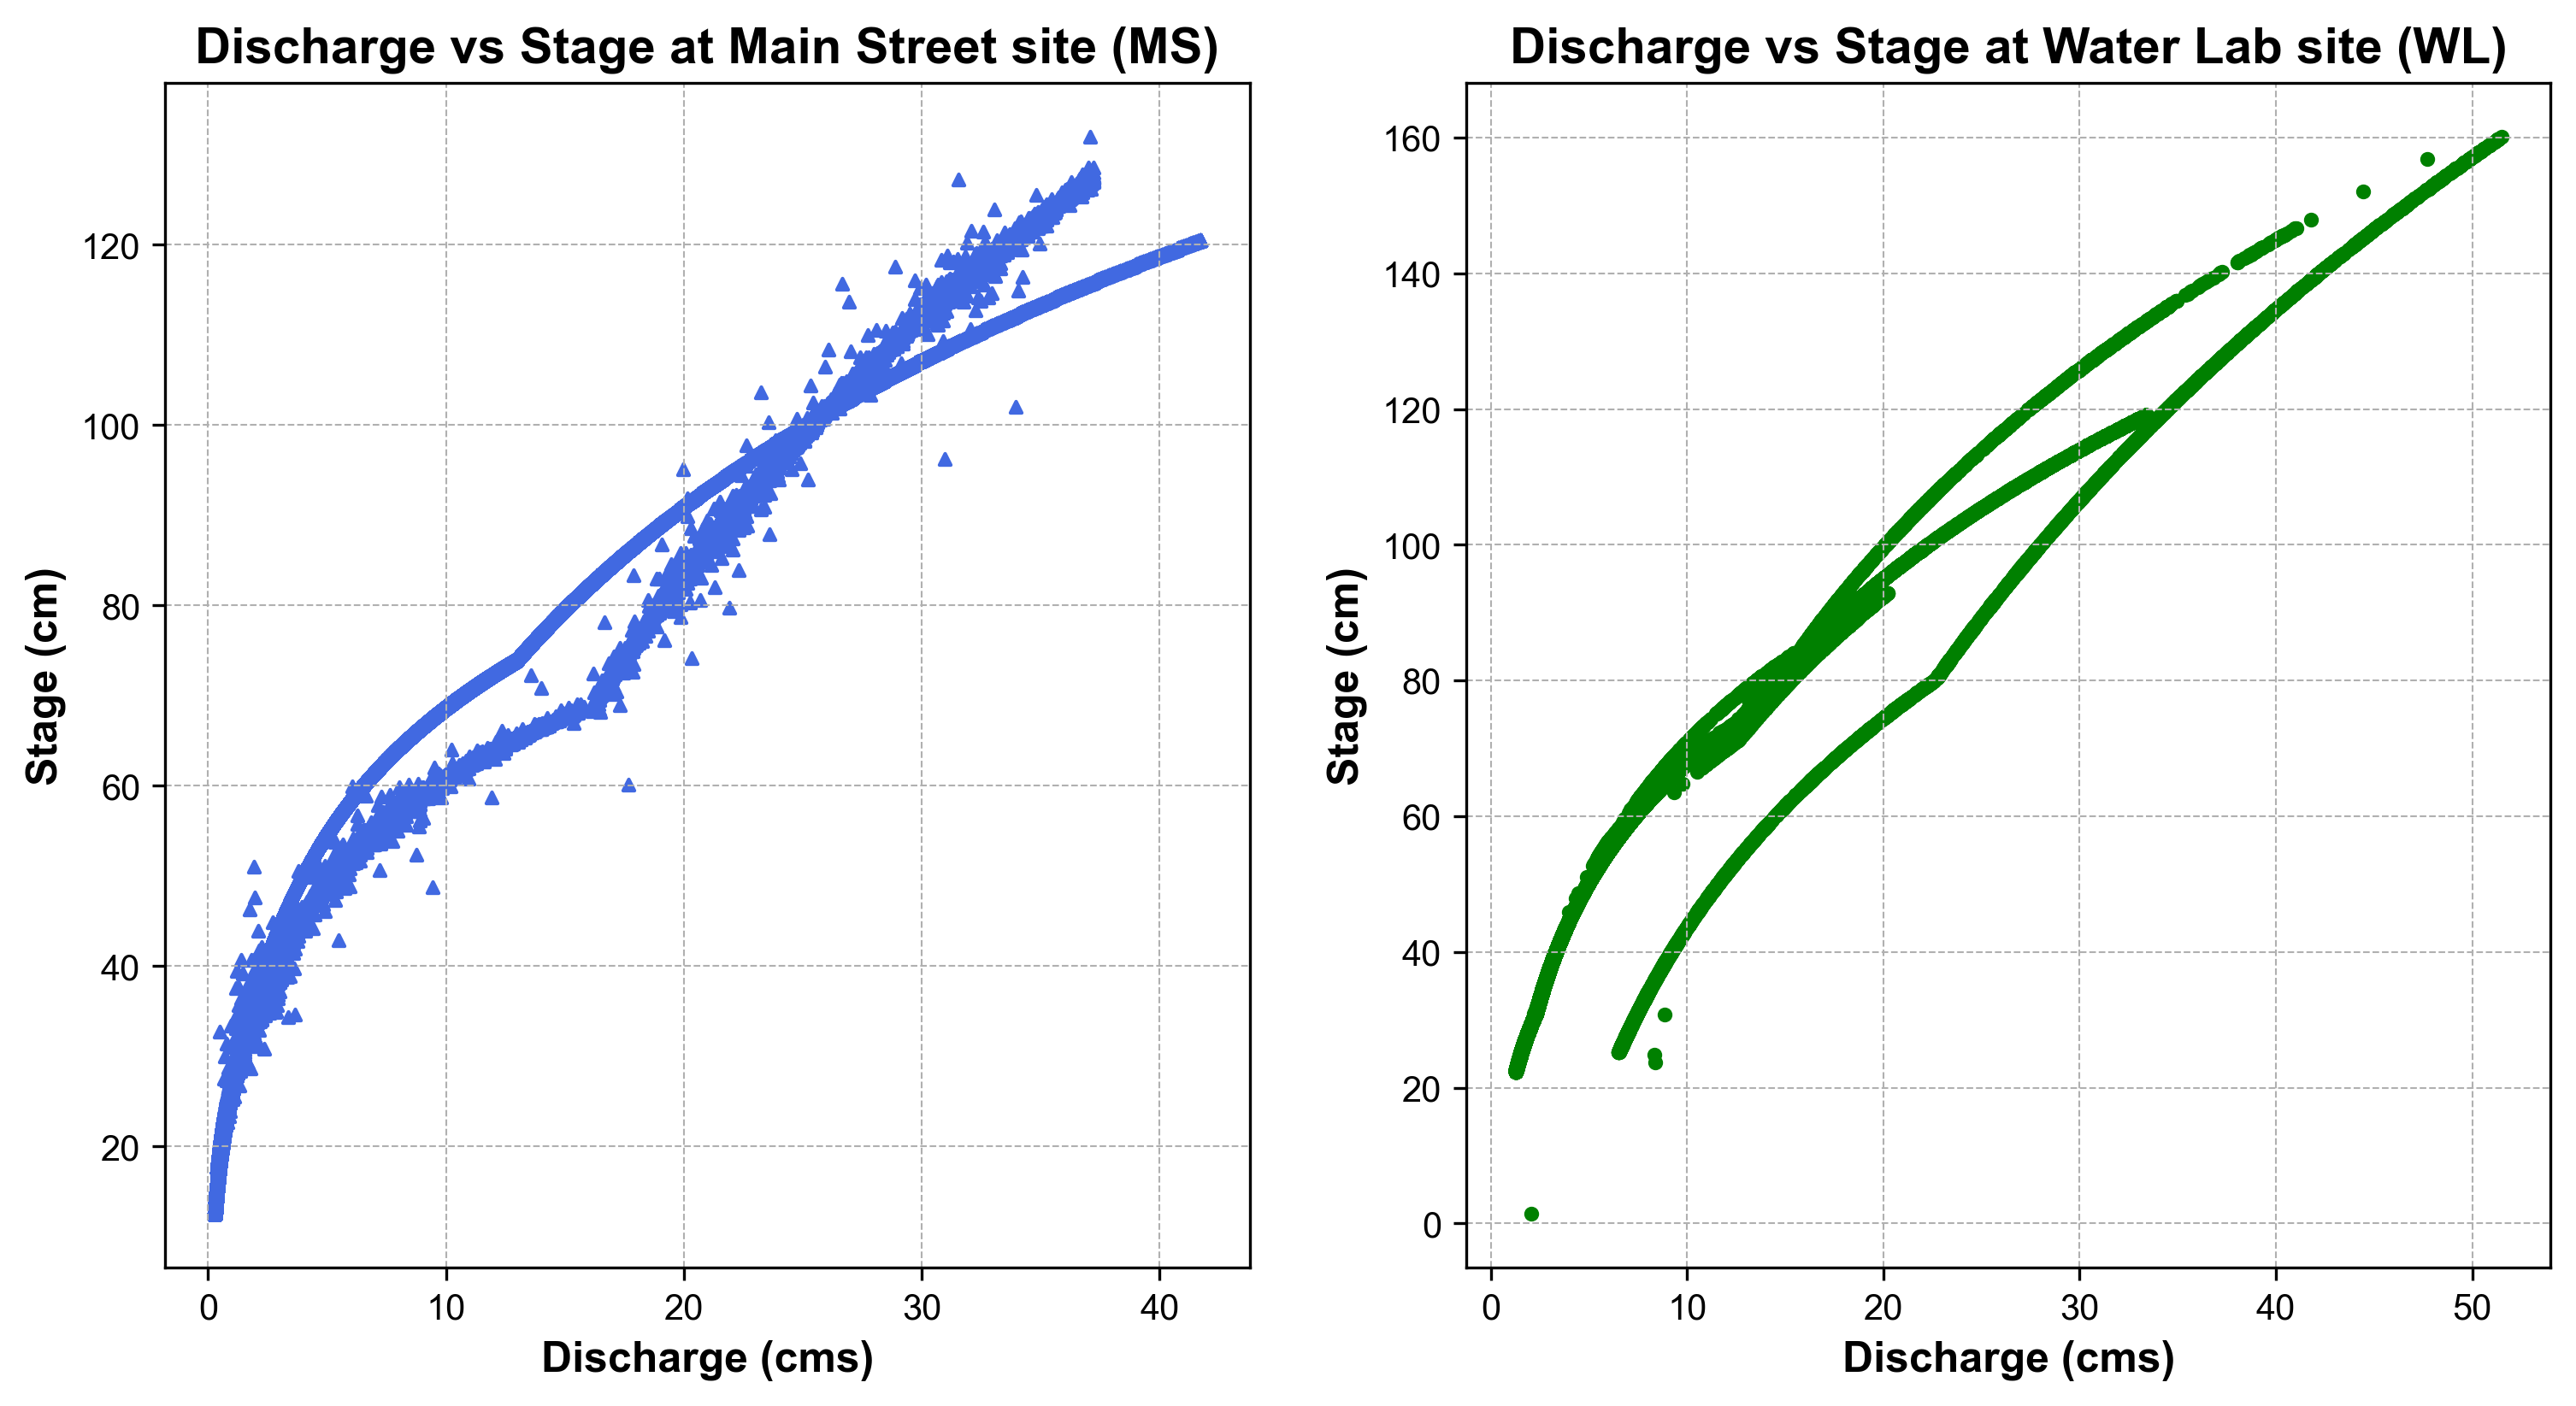

In [84]:
# Increase the figure size and set higher resolution
plt.figure(figsize=(12, 6), dpi=300)

# First subplot
ax1 = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
ax1.scatter(df_MS1.Discharge_cms, df_MS2.Stage, color='royalblue', marker='^', s=10)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.set_title('Discharge vs Stage at Main Street site (MS)', fontsize=14, fontweight='bold', fontname=myfont)
ax1.set_xlabel('Discharge (cms)', fontsize=12, fontweight='bold', fontname=myfont)
ax1.set_ylabel('Stage (cm)', fontsize=12, fontweight='bold', fontname=myfont)

# Second subplot
ax2 = plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
ax2.scatter(df_WL1.Discharge_cms, df_WL2.Stage, color='green', marker='o', s=10)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_title('Discharge vs Stage at Water Lab site (WL)', fontsize=14, fontweight='bold', fontname=myfont)
ax2.set_xlabel('Discharge (cms)', fontsize=12, fontweight='bold', fontname=myfont)
ax2.set_ylabel('Stage (cm)', fontsize=12, fontweight='bold', fontname=myfont)

# plot
# plt.savefig('1.1. Discharge vs Stage.png', dpi=300, transparent=True, bbox_inches='tight')

# Show the plot
#plt.show()

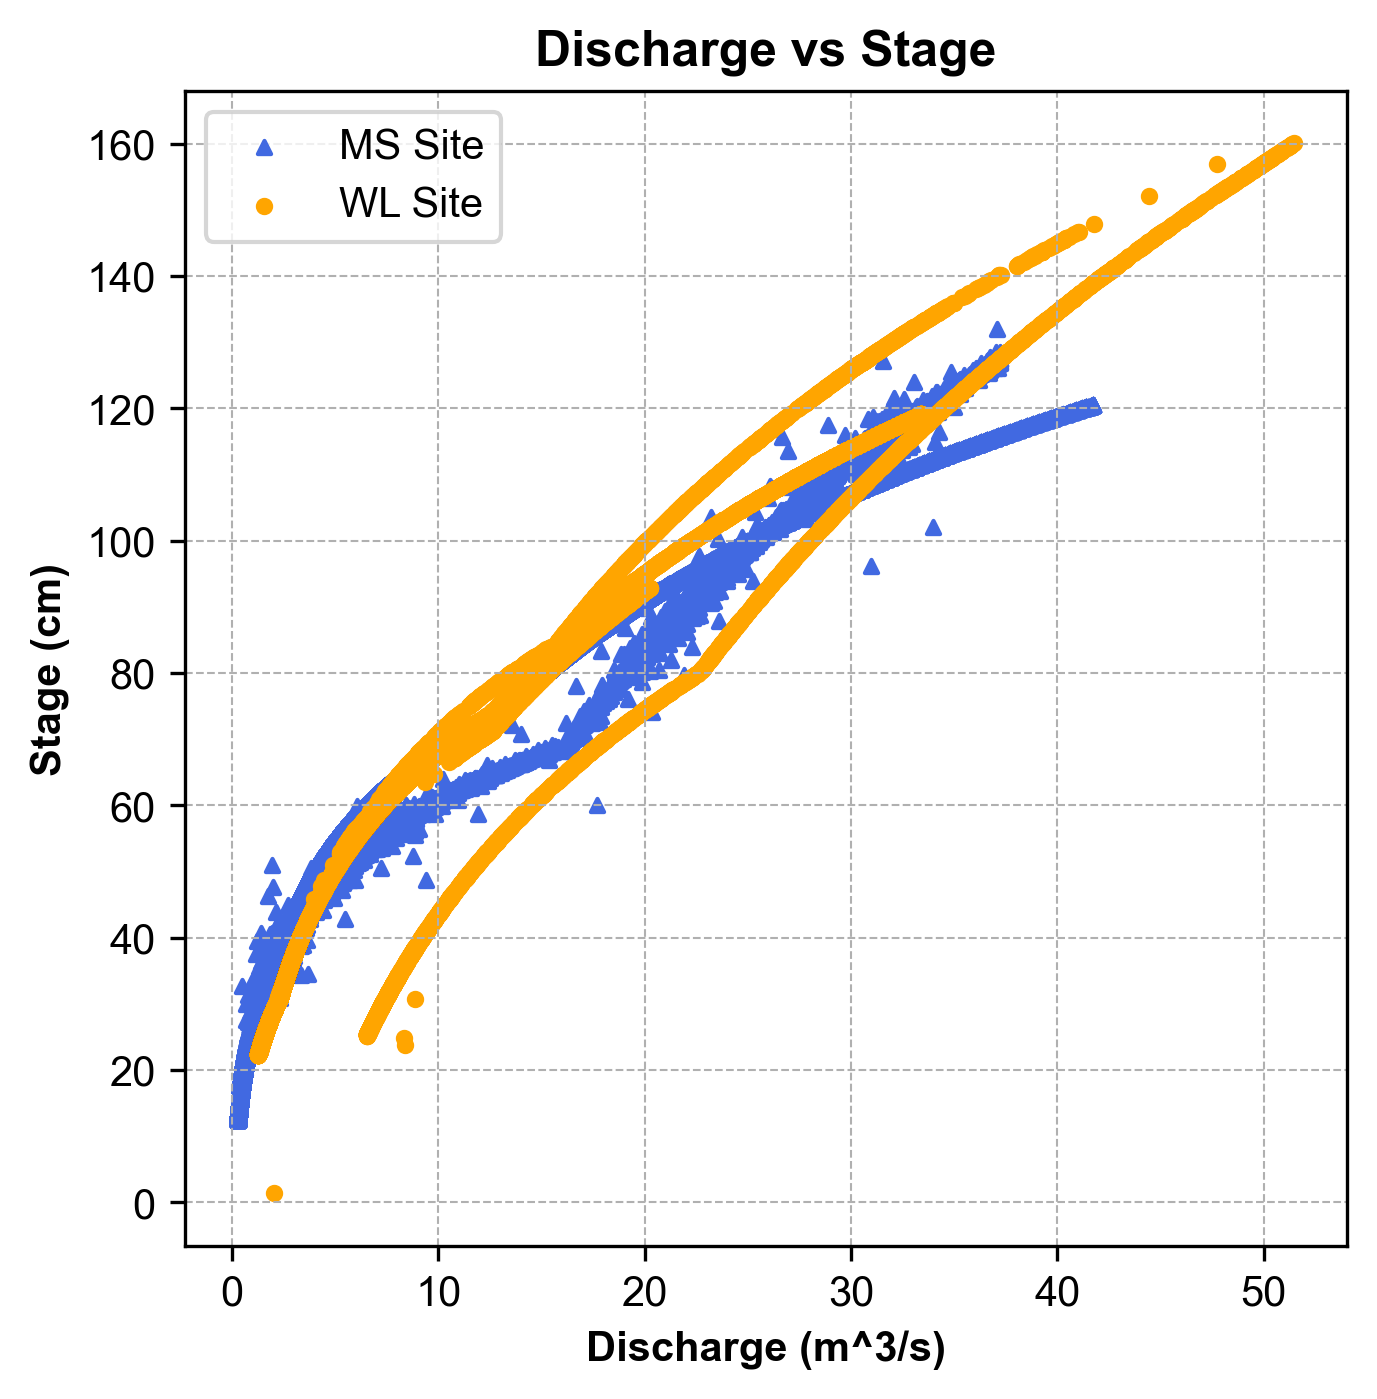

In [85]:
# Setting the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = [myfont]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)  # Note the change here to plt.subplots()

# Plot the data
ax.scatter(df_MS1.Discharge_cms, df_MS2.Stage, color='royalblue', marker='^', s=10, label='MS Site')
ax.scatter(df_WL1.Discharge_cms, df_WL2.Stage, color='orange', marker='o', s=10, label='WL Site')

# Customize the plot
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_title('Discharge vs Stage', fontsize=12, fontweight='bold', fontname=myfont)
ax.set_xlabel('Discharge (m^3/s)', fontsize=10, fontweight='bold', fontname=myfont)
ax.set_ylabel('Stage (cm)', fontsize=10, fontweight='bold', fontname=myfont)
ax.legend(loc='best')  # Add a legend

# plot
plt.savefig('1.1. Discharge vs Stage.png', dpi=300, transparent=True, bbox_inches='tight')


# Show the plot
plt.show()


# 1.2: Descriptive statistic

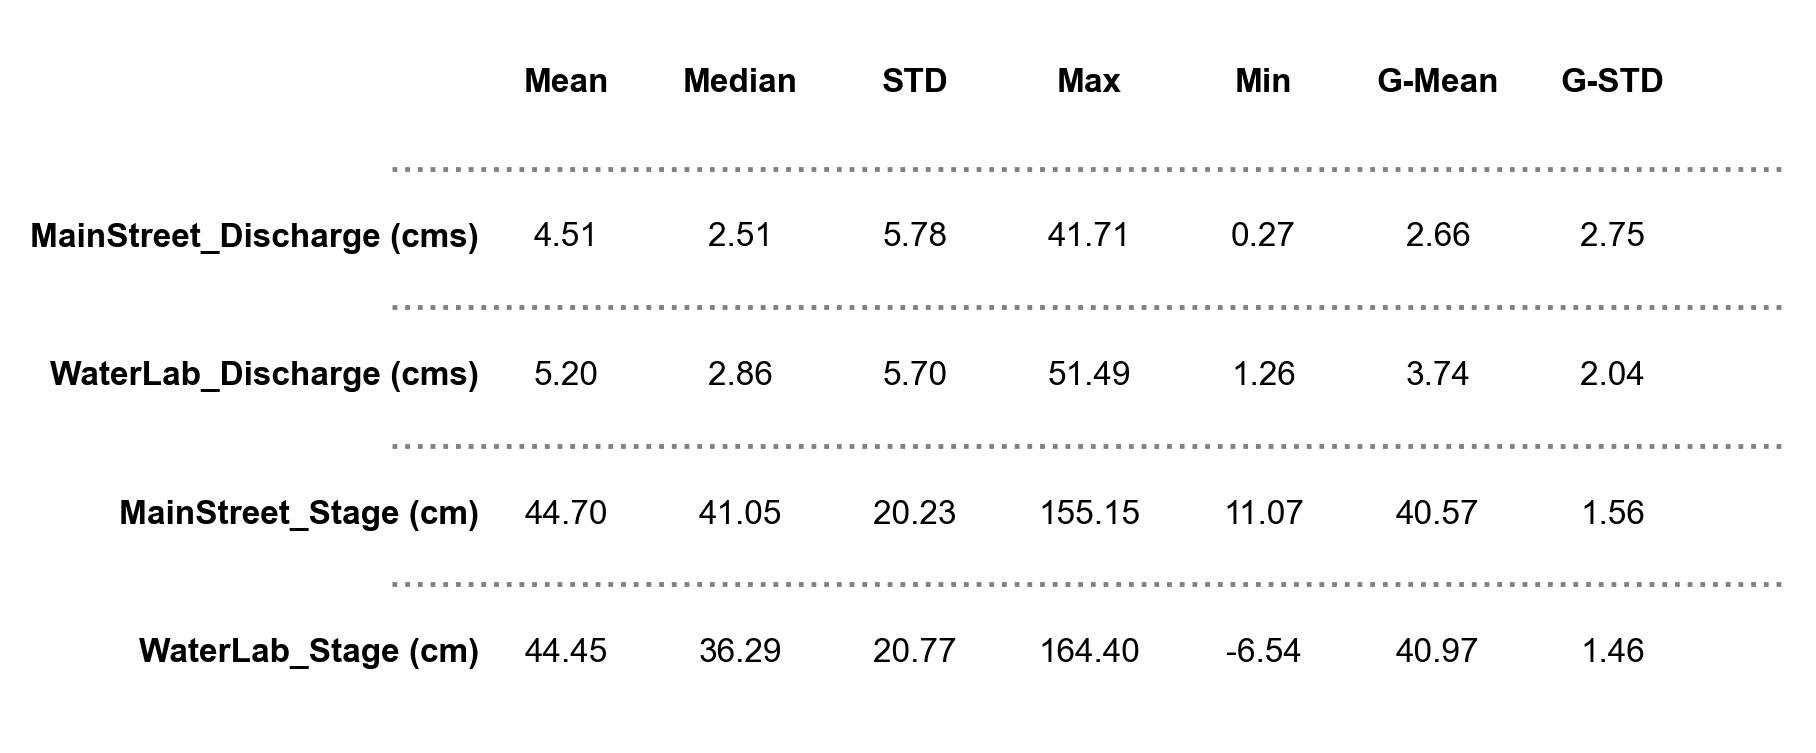

In [86]:
data = {
    'MainStreet_Discharge (cms)': df_MS1.Discharge_cms,
    'WaterLab_Discharge (cms)': df_WL1.Discharge_cms,
    'MainStreet_Stage (cm)': df_MS2.Stage,
    'WaterLab_Stage (cm)': df_WL2.Stage,
}

df = pd.DataFrame(data)

# Calculating statistical metrics including geometric mean and standard deviation
stats = df.agg(['mean', 'median', 'std', 'max', 'min']).T

# Apply mask for geometric calculations
positive_mask = df > 0

# Safe function to calculate geometric mean and std avoiding non-positive values
def safe_gmean(series):
    filtered_series = series[series > 0]
    if not filtered_series.empty:
        return gmean(filtered_series)
    return np.nan  # Return NaN if no positive values

def safe_gstd(series):
    filtered_series = np.log(series[series > 0])
    if not filtered_series.empty:
        return np.exp(np.std(filtered_series))
    return np.nan

stats['gmean'] = df.apply(safe_gmean, axis=0)
stats['gstd'] = df.apply(safe_gstd, axis=0)

# Visualization adjustments
fig = plt.figure(figsize=(6, 3), dpi=300)
ax = plt.subplot()

ncols = 7
nrows = stats.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

# Positions and column names for the statistical metrics, added gmean and gstd
positions = [1, 2, 3, 4, 5, 6, 7]
column_names = ['Mean', 'Median', 'STD', 'Max', 'Min', 'G-Mean', 'G-STD']

# Add table's main text with specified font size
for i, (index, row) in enumerate(stats.iterrows()):
    for j, (columnName, value) in enumerate(row.items()):
        text_label = f'{value:.2f}' if not np.isnan(value) else 'n/a'
        ax.annotate(text=text_label, xy=(positions[j], nrows-i-0.5), ha='center', va='center', fontsize=8, fontname=myfont)

# Add column names with specified font size
for index, name in enumerate(column_names):
    ax.annotate(text=name, xy=(positions[index], nrows + 0.5), ha='center', va='bottom', weight='bold', fontsize=8, fontname=myfont)

# Add dividing lines and series names
for x in range(1, nrows + 1):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3)

for i, index in enumerate(stats.index):
    ax.annotate(text=index, xy=(0.5, nrows-i-0.5), ha='right', va='center', weight='bold', fontsize=8, fontname=myfont)

ax.set_axis_off()

#plt.savefig('1. Descriptive statistic of datasets.png', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

# 2: Time series

In [87]:
# Main Street

# fig size
plt.figure(figsize=(20, 6), dpi=300)

# Create axes
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plotting
ax1.plot(df_MS1.Discharge_cms, '-', color='red', label='Discharge', linewidth=1
         #, marker='*'
        )
ax2.plot(df_MS2.Stage, '-.', color='royalblue', label='Stage', linewidth=2
         #, marker='s'
        )

# Enhancements
ax1.set_xlabel('Time', fontsize=22, fontweight= 'bold')
ax1.set_ylabel('Discharge (m^3/s)', color='black', fontsize=22, fontweight= 'bold')
ax2.set_ylabel('Stage (cm)', color='black', fontsize=22, fontweight= 'bold')

ax1.tick_params(axis='y', labelcolor='black', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelcolor='black', labelsize=18)

#ax1.xaxis.set_major_locator(mdates.YearLocator())
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.grid(True, which='both', linestyle='--')

# Legends
ax1.legend(loc='upper left', fontsize=18)
ax2.legend(loc='upper right', fontsize=18)

plt.title('Discharge & Stage Time Series of MainStreet station', fontsize=28, fontweight= 'bold')
plt.tight_layout()

# Save the figure with high resolution
#plt.savefig('2.1. Discharge & Stage Time Series of MainStreet station.png', dpi=300)

plt.show()

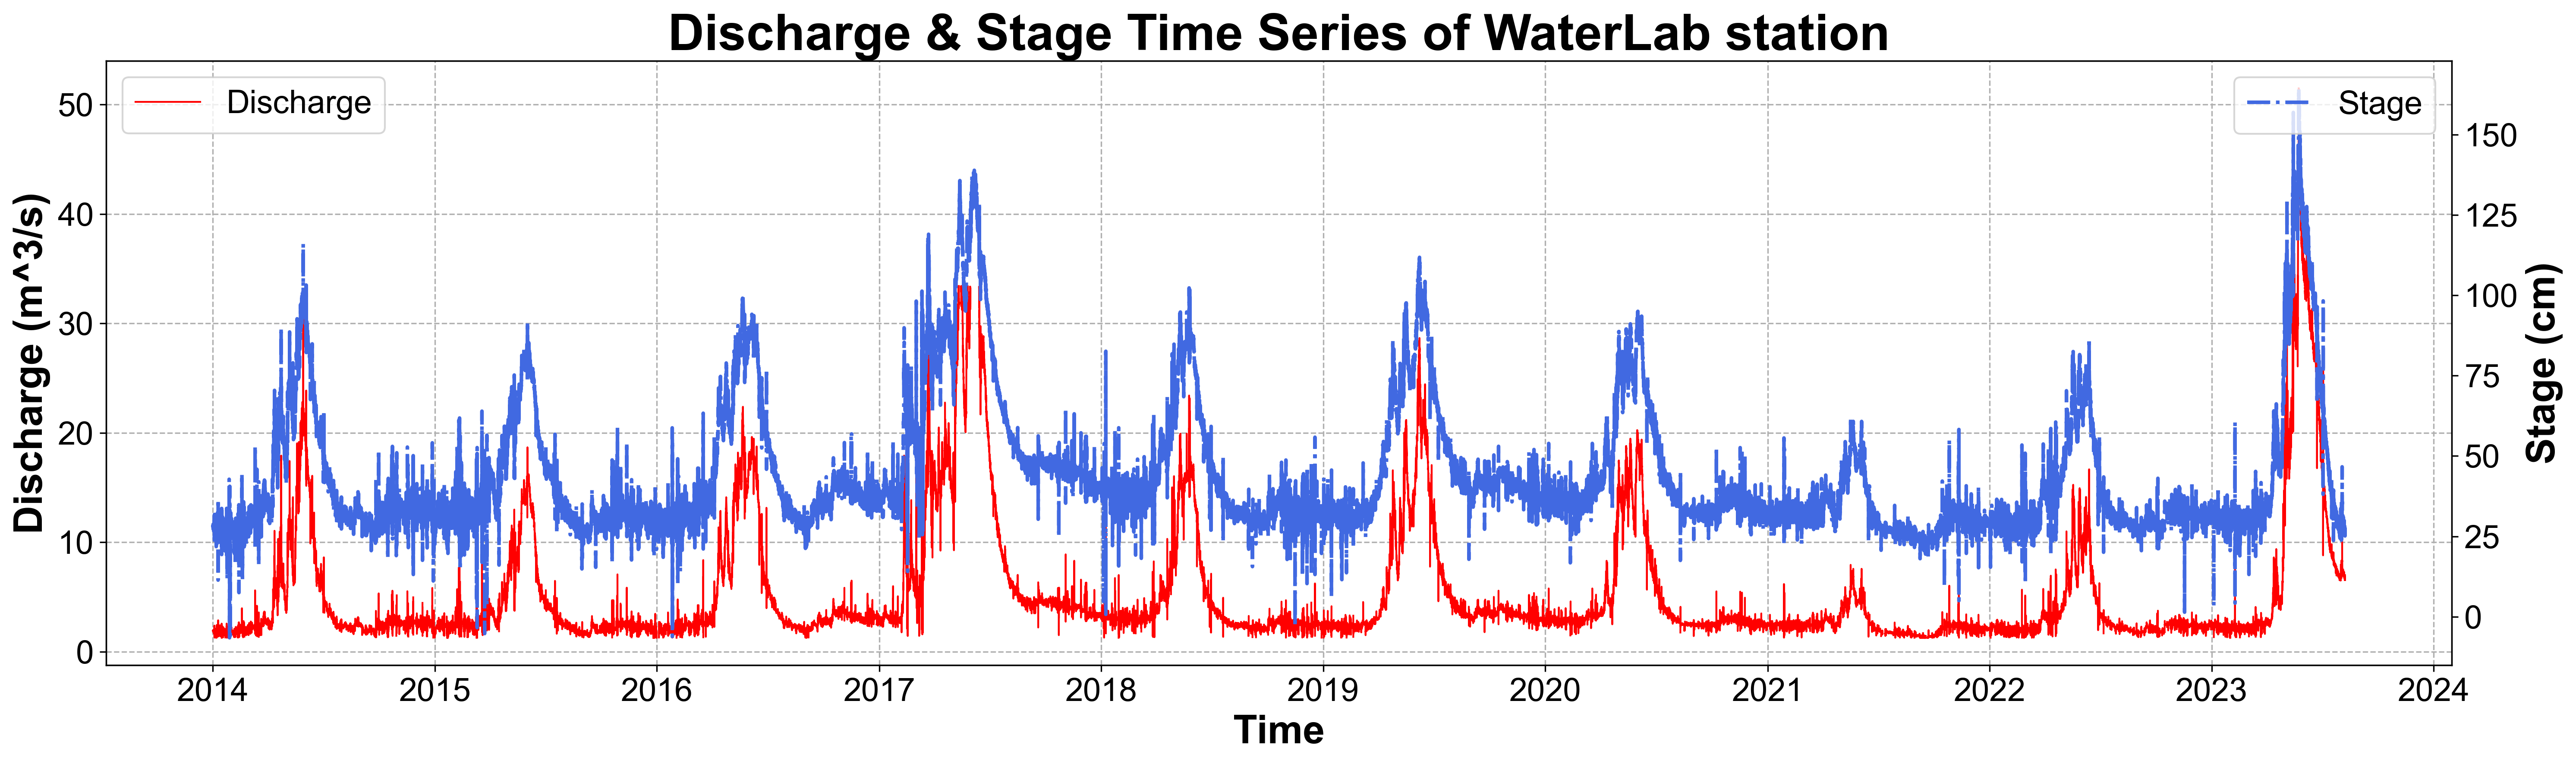

In [88]:
# Water lab

# fig size
plt.figure(figsize=(20, 6), dpi=300)

# Create axes
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plotting
#plt.subplot (1,2,1)
ax1.plot(df_WL1.Discharge_cms, '-', color='red', label='Discharge', linewidth=1
         #, marker='*'
        )
        
ax2.plot(df_WL2.Stage, '-.', color='royalblue', label='Stage', linewidth=2
         #, marker='s'
        )

# Enhancements
ax1.set_xlabel('Time', fontsize=22, fontweight= 'bold')
ax1.set_ylabel('Discharge (m^3/s)', color='black', fontsize=22, fontweight= 'bold')
ax2.set_ylabel('Stage (cm)', color='black', fontsize=22, fontweight= 'bold')

ax1.tick_params(axis='y', labelcolor='black', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelcolor='black', labelsize=18)

#ax1.xaxis.set_major_locator(mdates.YearLocator())
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.grid(True, which='both', linestyle='--')

# Legends
ax1.legend(loc='upper left', fontsize=18)
ax2.legend(loc='upper right', fontsize=18)

plt.title('Discharge & Stage Time Series of WaterLab station', fontsize=28, fontweight= 'bold')
plt.tight_layout()

# Save the figure with high resolution
#plt.savefig('2.2. Discharge & Stage Time Series of WaterLab station.png', dpi=300)

plt.show()

In [89]:
# discharge


# Set figure size
plt.figure(figsize=(20, 6))

# Create a subplot
ax01 = plt.subplot()

# Plotting
ax01.plot(df_WL1.Discharge_cms, '-', color='red', label='WaterLab', linewidth=1
          #, marker='*'
         )
ax01.plot(df_MS1.Discharge_cms, '-', color='royalblue', label='MainStreet', linewidth=1
          #, marker='*'
         )


# Enhancements
ax01.set_xlabel('Time (year)', fontsize=22, fontweight= 'bold')
ax01.set_ylabel('Discharge (m^3/s)', color='black', fontsize=22, fontweight= 'bold')
ax01.tick_params(axis='y', labelcolor='black', labelsize=18)
ax01.tick_params(axis='x', labelsize=18)
ax01.grid(True, which='both', linestyle='--')

# Legends
ax01.legend(loc='upper left', fontsize=18)

# Title
plt.title('Discharge Time Series Comparison of stations', fontsize=28, fontweight= 'bold')
plt.tight_layout()

# Save the figure with high resolution
#plt.savefig('2.3. Discharge Time Series Comparison of stations.png', dpi=300)

# Display the plot
plt.show()


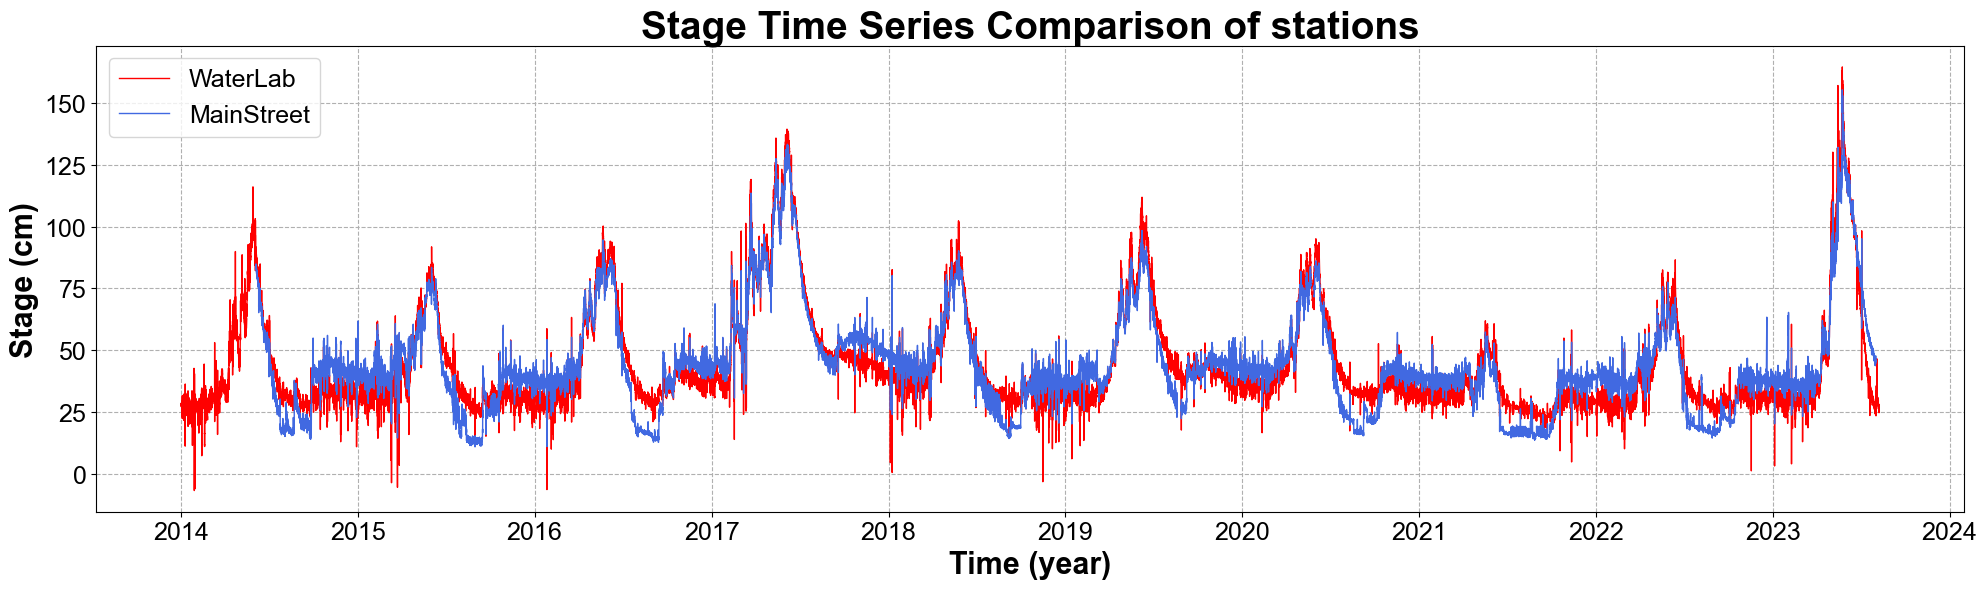

In [90]:
# stage

# Set figure size
plt.figure(figsize=(20, 6))

# Create a subplot
ax01 = plt.subplot()

# Plotting
ax01.plot(df_WL2.Stage, '-', color='red', label='WaterLab', linewidth=1
          #, marker='*'
         )
ax01.plot(df_MS2.Stage, '-', color='royalblue', label='MainStreet', linewidth=1
          #, marker='*'
         )


# Enhancements
ax01.set_xlabel('Time (year)', fontsize=22, fontweight= 'bold')
ax01.set_ylabel('Stage (cm)', color='black', fontsize=22, fontweight= 'bold')
ax01.tick_params(axis='y', labelcolor='black', labelsize=18)
ax01.tick_params(axis='x', labelsize=18)
ax01.grid(True, which='both', linestyle='--')

# Legends
ax01.legend(loc='upper left', fontsize=18)

# Title
plt.title('Stage Time Series Comparison of stations', fontsize=28, fontweight= 'bold')
plt.tight_layout()

# Save the figure with high resolution
#plt.savefig('2.4. Stage Time Series Comparison of stations.png', dpi=300)

# Display the plot
plt.show()

# 3: Histogram

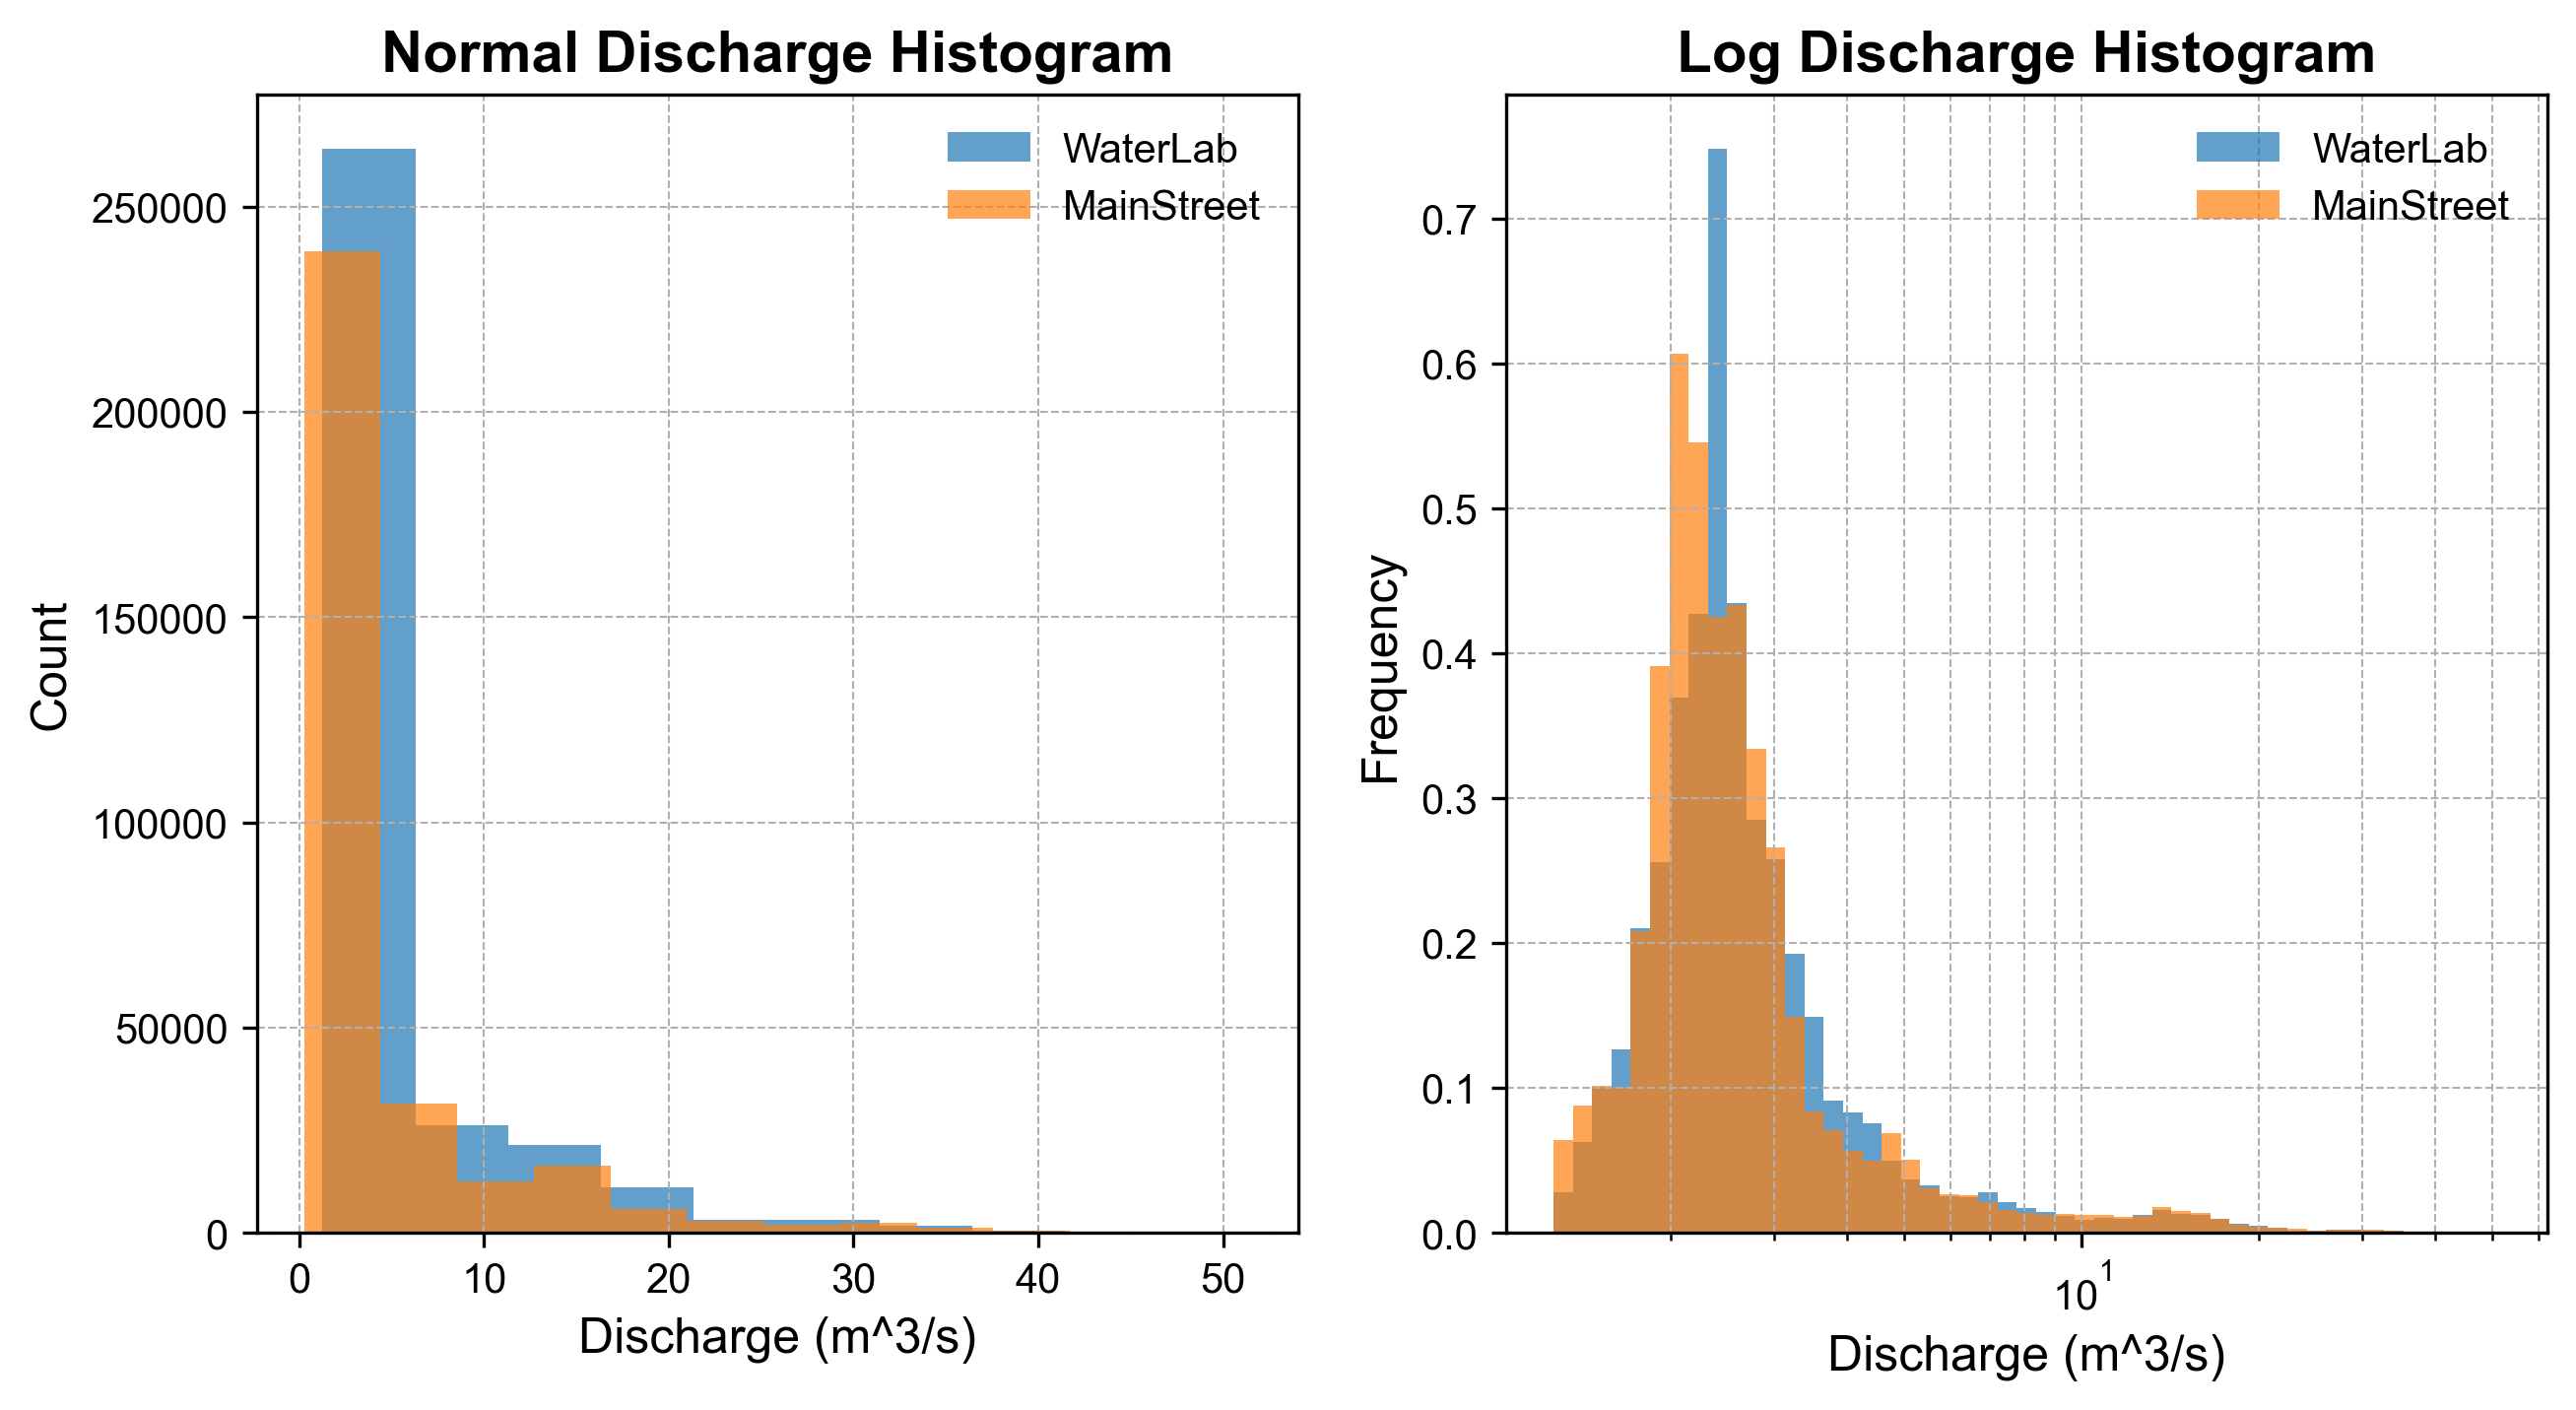

In [91]:
# Setup figure and axes
plt.figure(figsize=(10, 5), dpi=300)

# Normal Histogram
ax1 = plt.subplot(1, 2, 1)
ax1.hist(df_WL1['Discharge_cms'], alpha=0.7, label='WaterLab')
ax1.hist(df_MS1['Discharge_cms'], alpha=0.7, label='MainStreet')
ax1.set_title('Normal Discharge Histogram', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax1.set_xlabel('Discharge (m^3/s)', fontdict={'fontsize': 12})
ax1.set_ylabel('Count', fontdict={'fontsize': 12})
ax1.legend(frameon=False)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Logarithmic Histogram
ax2 = plt.subplot(1, 2, 2)
# Ensure that you filter out non-positive values for log-scale histogram
filtered_WL1 = df_WL1[df_WL1['Discharge_cms'] > 0]
filtered_MS1 = df_MS1[df_MS1['Discharge_cms'] > 0]
# Define log bins
log_bins = np.logspace(np.log10(filtered_WL1['Discharge_cms'].min()), 
                       np.log10(filtered_WL1['Discharge_cms'].max()), 50)
ax2.hist(filtered_WL1['Discharge_cms'], bins=log_bins, alpha=0.7, label='WaterLab', density=True)
ax2.hist(filtered_MS1['Discharge_cms'], bins=log_bins, alpha=0.7, label='MainStreet', density=True)
ax2.set_title('Log Discharge Histogram', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax2.set_xlabel('Discharge (m^3/s)', fontdict={'fontsize': 12})
ax2.set_ylabel('Frequency', fontdict={'fontsize': 12})
ax2.set_xscale('log')
ax2.legend(frameon=False)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Save the figure with high resolution
#plt.savefig('3.1. Discharge_Histogram.png', dpi=300)

# Display the plot
plt.show()


In [92]:
# Setup figure and axes
plt.figure(figsize=(10, 5), dpi=300)

# Normal Histogram
ax1 = plt.subplot(1, 2, 1)
ax1.hist(df_WL2['Stage'], alpha=0.7, label='WaterLab')
ax1.hist(df_MS2['Stage'], alpha=0.7, label='MainStreet')
ax1.set_title('Normal Stage Histogram', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax1.set_xlabel('Stage (cm)', fontdict={'fontsize': 12})
ax1.set_ylabel('Count', fontdict={'fontsize': 12})
ax1.legend(frameon=False)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Logarithmic Histogram
ax2 = plt.subplot(1, 2, 2)
# Ensure that you filter out non-positive values for log-scale histogram
filtered_WL2 = df_WL2[df_WL2['Stage'] > 0]
filtered_MS2 = df_MS2[df_MS2['Stage'] > 0]
# Define log bins
log_bins = np.logspace(np.log10(filtered_WL2['Stage'].min()), 
                       np.log10(filtered_WL2['Stage'].max()), 50)
ax2.hist(filtered_WL2['Stage'], bins=log_bins, alpha=0.7, label='WaterLab', density=True)
ax2.hist(filtered_MS2['Stage'], bins=log_bins, alpha=0.7, label='MainStreet', density=True)
ax2.set_title('Log Stage Histogram', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax2.set_xlabel('Stage (cm)', fontdict={'fontsize': 12})
ax2.set_ylabel('Frequency', fontdict={'fontsize': 12})
ax2.set_xscale('log')
ax2.legend(frameon=False)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Save the figure with high resolution
#plt.savefig('3.2. Stage_Histogram.png', dpi=300)

# Display the plot
plt.show()


# 4: Rescaling

In [93]:
def x_pdf(x): ##creates an x axis for plotting PDFs centered on the middle of histogram bins. Function takes the bin side locations returned from the hist commaand
    return (x[0:len(x)-1]+x[1:len(x)])/2 

def xr_cdf(x): ##creates an x axis for plotting the cdf
    return x.sort_values(ascending=True)

def recurrence(x): ##computes recurrence cdf for plotting
    r_x=np.arange(1,len(x)+1,1,dtype='float')
    return r_x

In [94]:
# discharge dataset
MS_bins=np.logspace(np.log10(df_MS1.Discharge_cms.min())*0.99,np.log10(df_MS1.Discharge_cms.max())*1.01,100)
WL_bins=np.logspace(np.log10(df_WL1.Discharge_cms.min())*0.99,np.log10(df_WL1.Discharge_cms.max())*1.01,100)

n_MS, bins_MS = np.histogram(df_MS1.Discharge_cms,bins=MS_bins,density=True)
n_WL, bins_WL = np.histogram(df_WL1.Discharge_cms,bins=WL_bins,density=True)

In [95]:
# Set figure size
plt.figure(figsize=(12, 5), dpi=300)

# Create a subplot on the created figure
ax2 = plt.subplot()

# Plotting with markers, setting marker face color (mfc), marker edge color (mec), and using 'o' as marker
ax2.plot(x_pdf(bins_MS), n_MS, 'o', mfc='royalblue', mec='k', label='MainStreet')
ax2.plot(x_pdf(bins_WL), n_WL, '^', mfc='orange', mec='k', label='WaterLab')

# Labeling and Styling
ax2.set_xlabel('Discharge (m^3/s)', fontweight= 'bold', fontsize=18)
ax2.set_ylabel('PDF', fontweight= 'bold', fontsize=18)
ax2.tick_params(axis='both', which='both', labelsize=18, direction='in', width=1.5, pad=4)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjusting spines for visibility
for spine in ['top', 'right', 'left', 'bottom']:
    ax2.spines[spine].set_linewidth(1.5)

# Setting logarithmic scale for both axes to match the original intent
ax2.set_xscale('log')
ax2.set_yscale('log')

# Legends and Title
ax2.legend(loc='upper right', fontsize=12)
plt.title('Rescaled Discharge Probability Distribution Functions', fontweight= 'bold', fontsize=20)

# Ensure layout is tight so everything fits without overlap
plt.tight_layout()


# Save the figure with high resolution
#plt.savefig('4. Rescaled Discharge Probability Distribution Functions.png', dpi=300)


# Display the plot
plt.show()


# 5. Standardization of data

In [96]:
def standard(x): ##standardizes the dataset
    xl=np.log(x) #take the log of x
    return (xl-np.mean(xl))/np.std(xl) #subtract the mean and divide by the standard deviation

In [97]:
import numpy as np
import pandas as pd


# deleting NaN
cleaned_MS1 = df_MS1.Discharge_cms.dropna()
cleaned_WL1 = df_WL1.Discharge_cms.dropna()

# Standardaization
standard_MS1 = standard(cleaned_MS1)
standard_WL1 = standard(cleaned_WL1)

# hist without NaN
n_MS, bins_MS = np.histogram(standard_MS1, bins='fd', density=True)
n_WL, bins_WL = np.histogram(standard_WL1, bins='fd', density=True)


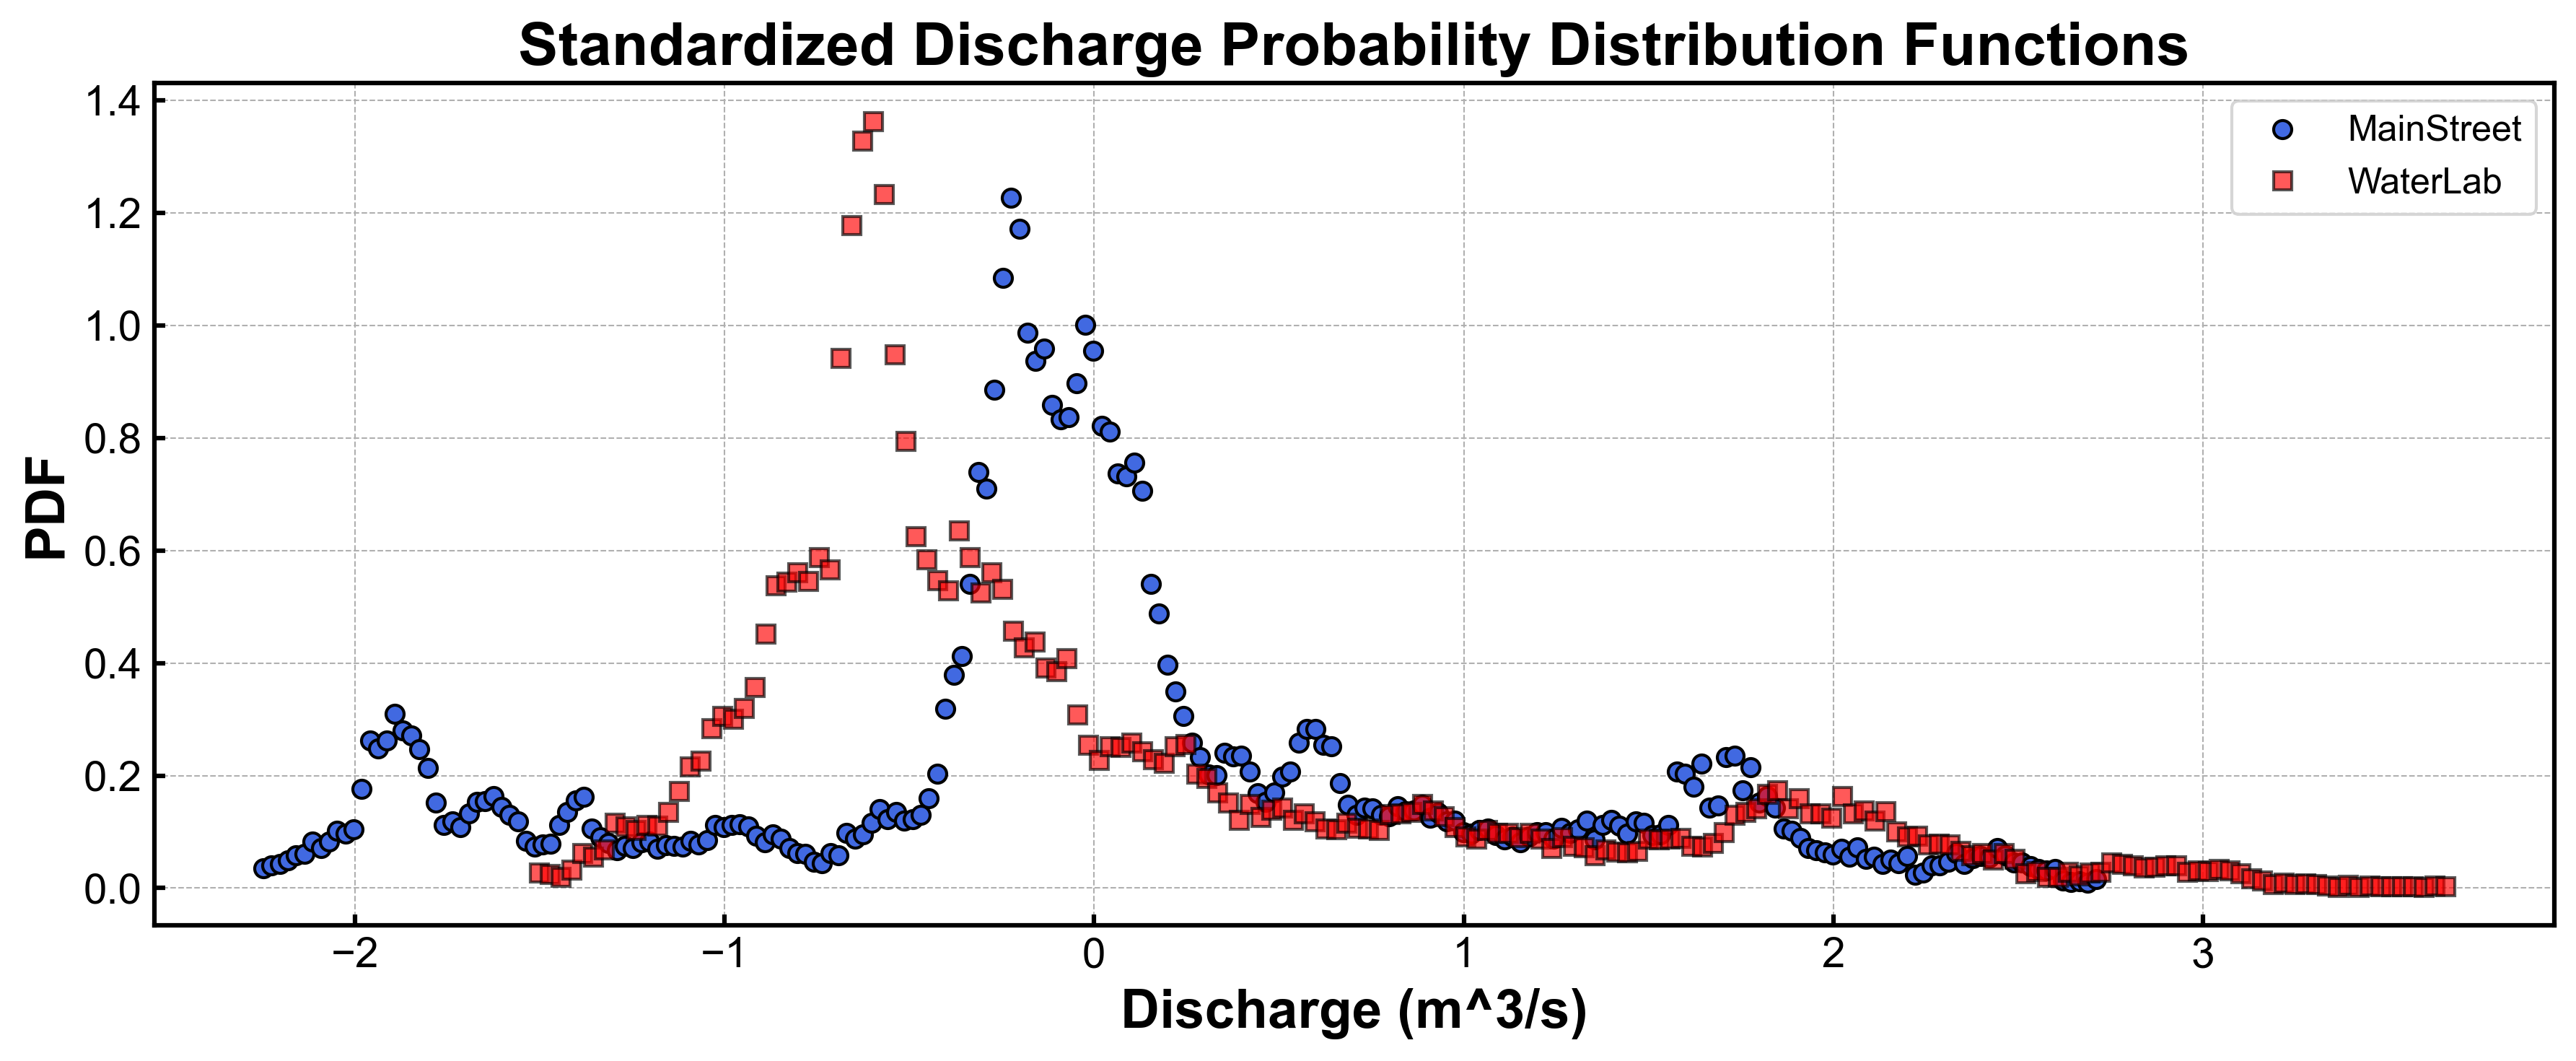

In [98]:
# Set figure size
plt.figure(figsize=(12, 5), dpi=300)

# Create a subplot
ax2 = plt.subplot()

# Plotting with different markers, setting marker face color (mfc), marker edge color (mec), and using different markers for each dataset
ax2.plot(x_pdf(bins_MS), n_MS, 'o', mfc='royalblue', mec='k', label='MainStreet')  # Circle marker for MainStreet
ax2.plot(x_pdf(bins_WL), n_WL, 's', mfc='red', mec='k', alpha=0.65, label='WaterLab')  # Triangle marker for WaterLab with transparency

# Labeling and Styling
ax2.set_xlabel('Discharge (m^3/s)', fontweight= 'bold', fontsize=18)
ax2.set_ylabel('PDF', fontweight= 'bold', fontsize=18)
ax2.tick_params(axis='both', which='both', labelsize=14, direction='in', width=1.5, pad=4)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjusting spines for visibility
for spine in ['top', 'right', 'left', 'bottom']:
    ax2.spines[spine].set_linewidth(1.5)

# Setting logarithmic scale for both axes to match the original intent
#ax2.set_xscale('log')
#ax2.set_yscale('log')

# Legends and Title
ax2.legend(loc='upper right', fontsize=12)
plt.title('Standardized Discharge Probability Distribution Functions', fontweight= 'bold', fontsize=20)

# Ensure layout is tight so everything fits without overlap
plt.tight_layout()

# Save the figure with high resolution
#plt.savefig('5. Standardized Discharge Probability Distribution Functions.png', dpi=300)



# Display the plot
plt.show()


In [99]:
import matplotlib.pyplot as plt

# Your data generation code here
# x_pdf, n_MS, bins_MS, n_WL, bins_WL would need to be defined prior to this plot code

# Set figure size
plt.figure(figsize=(12, 5), dpi=300)

# Create a subplot
ax2 = plt.subplot()

# Plotting with different markers, setting marker face color (mfc), marker edge color (mec), and using different markers for each dataset
ax2.plot(x_pdf(bins_MS), n_MS, 'o', mfc='royalblue', mec='k', label='MainStreet')  # Circle marker for MainStreet
ax2.plot(x_pdf(bins_WL), n_WL, 's', mfc='red', mec='k', alpha=0.65, label='WaterLab')  # Square marker for WaterLab with transparency

# Labeling and Styling
ax2.set_xlabel('Discharge (m^3/s)', fontweight='bold', fontsize=18)
ax2.set_ylabel('PDF', fontweight='bold', fontsize=18)
ax2.tick_params(axis='both', which='both', labelsize=14, direction='in', width=1.5, pad=4)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjusting spines for visibility
for spine in ['top', 'right', 'left', 'bottom']:
    ax2.spines[spine].set_linewidth(1.5)

# Setting logarithmic scale for the y-axis
ax2.set_yscale('log')

# Legends and Title
ax2.legend(loc='upper right', fontsize=12)
plt.title('Standardized Discharge Probability Distribution Functions', fontweight='bold', fontsize=20)

# Ensure layout is tight so everything fits without overlap
plt.tight_layout()

# Save the figure with high resolution
#plt.savefig('5. Standardized Discharge Probability Distribution Functions.png', dpi=300)

# Display the plot
plt.show()


# 6. Kernal Density Estimate (KDE) histogram

In [100]:
import numpy as np
from scipy.stats import gaussian_kde

# فرض بر این است که تابع standard و دیتافریم‌ها قبلاً تعریف شده‌اند

# تمیز کردن داده‌ها از مقادیر NaN و inf
cleaned_data_MS = df_MS1.Discharge_cms.replace([np.inf, -np.inf], np.nan).dropna()
cleaned_data_WL = df_WL1.Discharge_cms.replace([np.inf, -np.inf], np.nan).dropna()

# استانداردسازی داده‌های تمیز شده
standard_MS = standard(cleaned_data_MS)
standard_WL = standard(cleaned_data_WL)

# اجرای تابع kde بر روی داده‌های استاندارد شده
kde_MS = gaussian_kde(standard_MS)
kde_WL = gaussian_kde(standard_WL)

# ایجاد آرایه‌هایی برای نمودار
x_kde_MS = np.linspace(standard_MS.min(), standard_MS.max(), 100)
x_kde_WL = np.linspace(standard_WL.min(), standard_WL.max(), 100)

# محاسبه توزیع چگالی کرنل برای نمودار
n_kde_MS = kde_MS.evaluate(x_kde_MS)
n_kde_WL = kde_WL.evaluate(x_kde_WL)


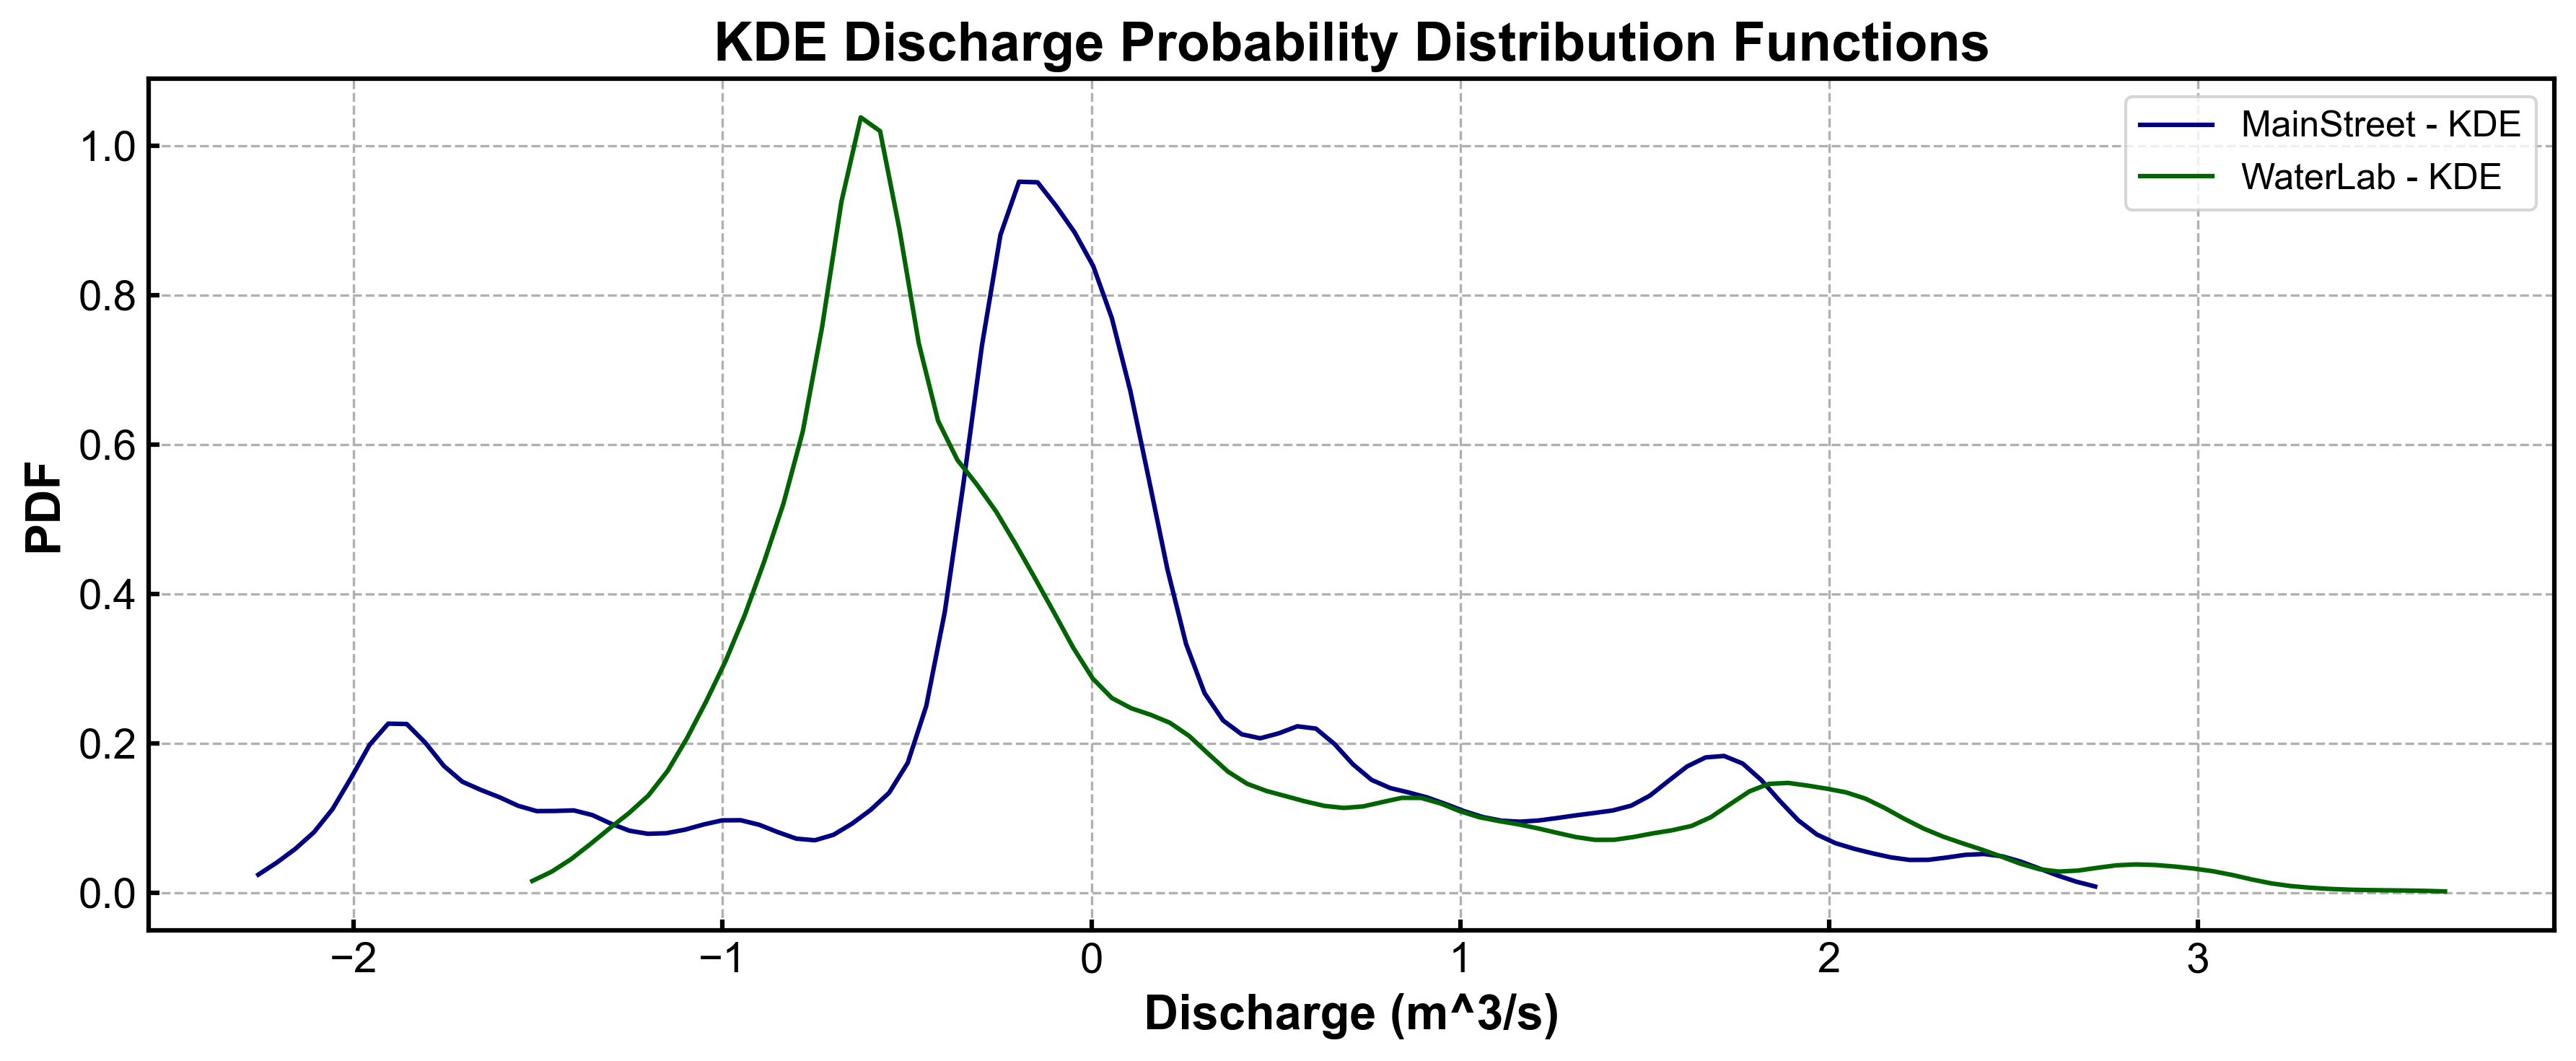

In [101]:
# Assuming x_kde_ys, n_kde_ys, x_kde_lr, n_kde_lr are defined
# and the functions to compute n_kde_ys and n_kde_lr are correctly implemented

# Set figure size to match the second code snippet
plt.figure(figsize=(12, 5), dpi=300)

# Create a subplot
ax2 = plt.subplot()

# Plotting kernel density estimates (KDE) for the provided datasets
# Note: The corrected implementation assumes n_kde_ys and n_kde_lr are arrays, not functions.
ax2.plot(x_kde_MS, n_kde_MS, '-', color='navy', linewidth=1.5, label='MainStreet - KDE')
ax2.plot(x_kde_WL, n_kde_WL, '-', color='darkgreen', linewidth=1.5, label='WaterLab - KDE')


# Labeling and Styling to match the enhanced style of the second code snippet
ax2.set_xlabel('Discharge (m^3/s)', fontweight='bold', fontsize=16)
ax2.set_ylabel('PDF', fontweight='bold', fontsize=16)
ax2.tick_params(axis='both', which='both', labelsize=14, direction='in', width=1.5, pad=4)
ax2.grid(True, which='both', linestyle='--')

# Adjusting spines for visibility
for spine in ['top', 'right', 'left', 'bottom']:
    ax2.spines[spine].set_linewidth(1.5)

# Legends and Title to match the second code snippet's approach
ax2.legend(loc='upper right', fontsize=12)
plt.title('KDE Discharge Probability Distribution Functions', fontweight='bold', fontsize=18)

# Ensure layout is tight so everything fits without overlap
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('6. KDE Discharge Probability Distribution Functions.png', dpi=300)



# Display the plot
plt.show()


MS2 Clean Data Stats: 0 0
WL2 Clean Data Stats: 0 0
Standard MS2 Data Stats: 0 0
Standard WL2 Data Stats: 18 0
Error in KDE computation: array must not contain infs or NaNs


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


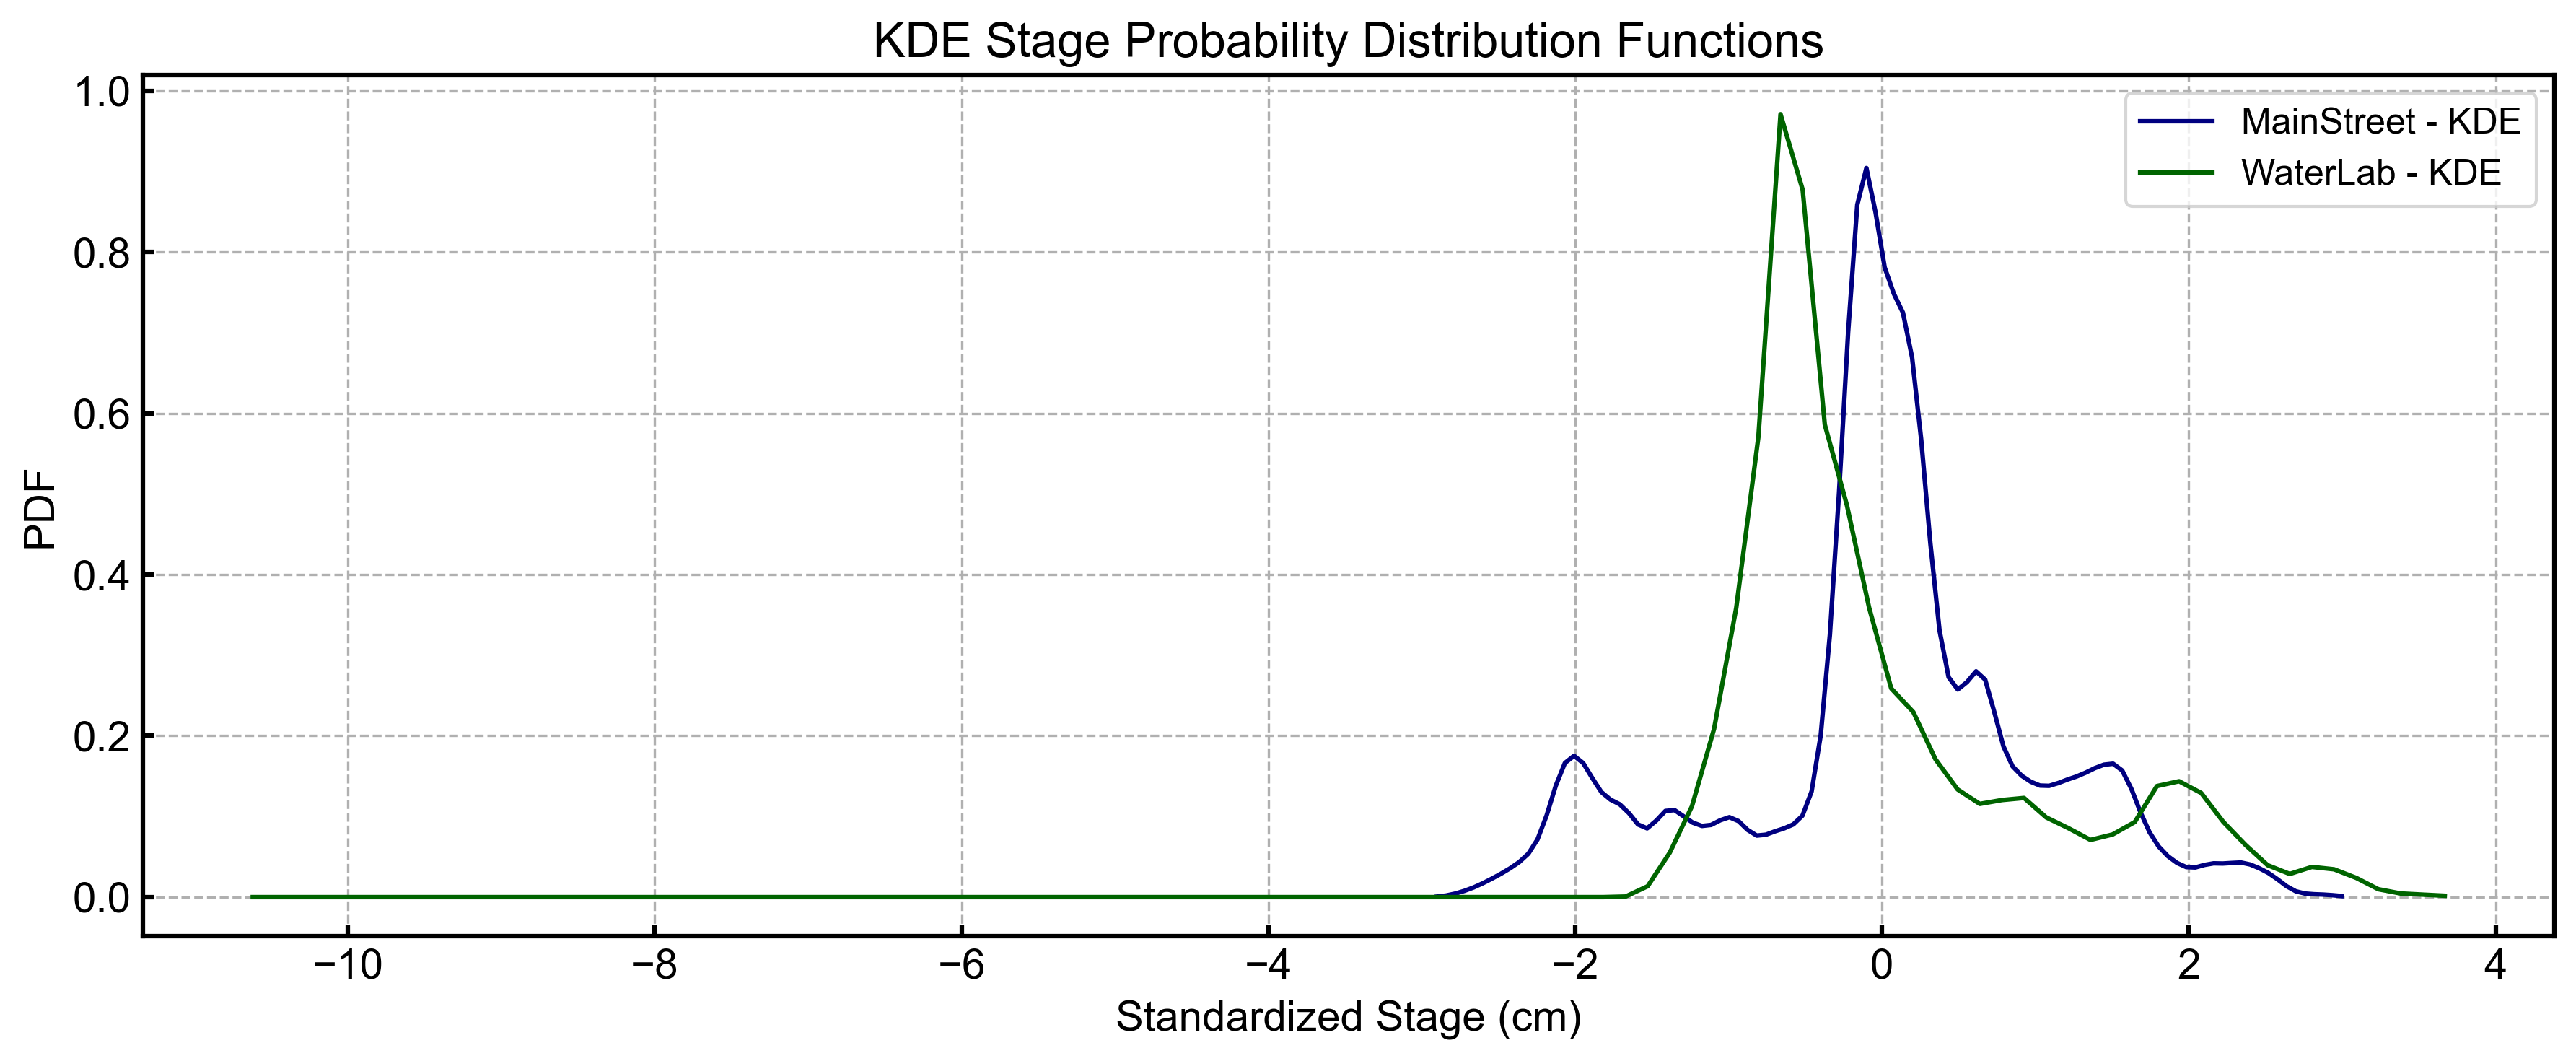

In [102]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Assuming 'df_MS2' and 'df_WL2' are defined and 'standard' function is properly implemented
# Clean the data of NaN and infinite values thoroughly
cleaned_data_MS = df_MS2['Stage'].replace([np.inf, -np.inf], np.nan).dropna()
cleaned_data_WL = df_WL2['Stage'].replace([np.inf, -np.inf], np.nan).dropna()

# Check if there are any remaining NaNs or Infs
print("MS2 Clean Data Stats:", cleaned_data_MS.isna().sum(), cleaned_data_MS.isin([np.inf, -np.inf]).sum())
print("WL2 Clean Data Stats:", cleaned_data_WL.isna().sum(), cleaned_data_WL.isin([np.inf, -np.inf]).sum())

# Standardize the cleaned data
standard_MS = standard(cleaned_data_MS)
standard_WL = standard(cleaned_data_WL)

# Check if standardization introduced any NaNs or Infs
print("Standard MS2 Data Stats:", np.isnan(standard_MS).sum(), np.isinf(standard_MS).sum())
print("Standard WL2 Data Stats:", np.isnan(standard_WL).sum(), np.isinf(standard_WL).sum())

# Attempt to execute the KDE function on standardized data
try:
    kde_MS = gaussian_kde(standard_MS)
    kde_WL = gaussian_kde(standard_WL)
except Exception as e:
    print("Error in KDE computation:", e)

# Create arrays for the KDE plot
x_kde_MS = np.linspace(min(standard_MS), max(standard_MS), 100)
x_kde_WL = np.linspace(min(standard_WL), max(standard_WL), 100)

# Compute kernel density estimates for plotting
n_kde_MS = kde_MS.evaluate(x_kde_MS)
n_kde_WL = kde_WL.evaluate(x_kde_WL)

# Plotting
plt.figure(figsize=(12, 5), dpi=300)
ax2 = plt.subplot()
ax2.plot(x_kde_MS, n_kde_MS, '-', color='navy', linewidth=1.5, label='MainStreet - KDE')
ax2.plot(x_kde_WL, n_kde_WL, '-', color='darkgreen', linewidth=1.5, label='WaterLab - KDE')
ax2.set_xlabel('Standardized Stage (cm)', fontsize=14)
ax2.set_ylabel('PDF', fontsize=14)
ax2.tick_params(axis='both', which='both', labelsize=14, direction='in', width=1.5, pad=4)
ax2.grid(True, which='both', linestyle='--')
for spine in ['top', 'right', 'left', 'bottom']:
    ax2.spines[spine].set_linewidth(1.5)
ax2.legend(loc='upper right', fontsize=12)
plt.title('KDE Stage Probability Distribution Functions', fontsize=16)
plt.tight_layout()
plt.show()


# 7: Recurrence intervals

In [103]:
# discharge datasets
MS1_peak=df_MS1['Discharge_cms'].resample('Y').max()
WL1_peak=df_WL1['Discharge_cms'].resample('Y').max()

/var/folders/xh/6f0lgvxn3z39lslpv0q32r0h0000gn/T/ipykernel_97802/2803619382.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  MS1_peak=df_MS1['Discharge_cms'].resample('Y').max()
/var/folders/xh/6f0lgvxn3z39lslpv0q32r0h0000gn/T/ipykernel_97802/2803619382.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  WL1_peak=df_WL1['Discharge_cms'].resample('Y').max()


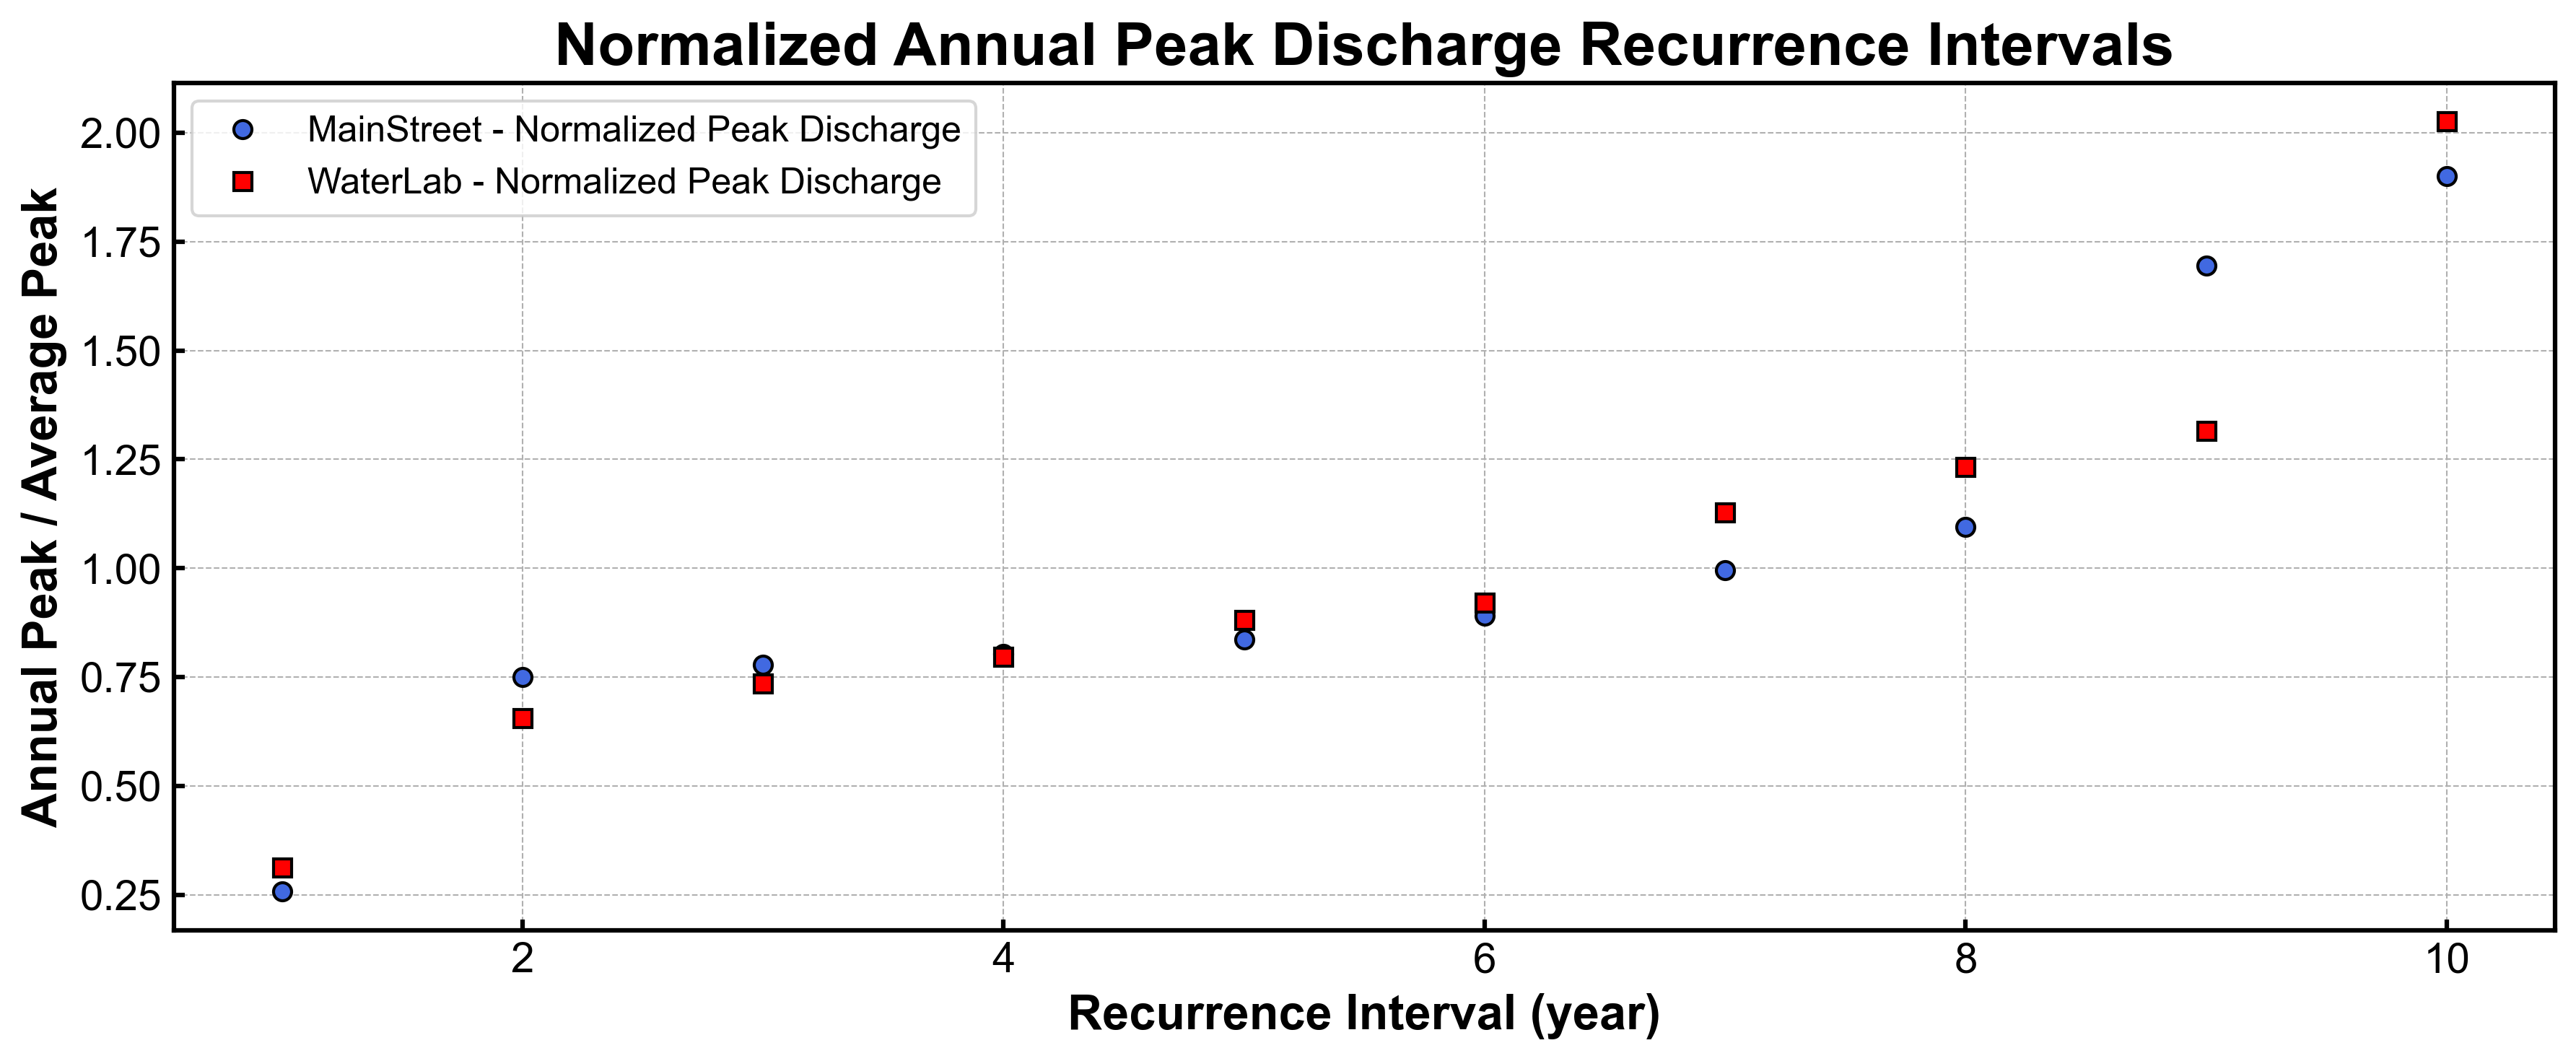

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Set figure size to match code 2 style
plt.figure(figsize=(12, 5), dpi=300)

# Create a subplot
ax4 = plt.subplot()

# Plotting with specific markers, matching colors, and including labels for clarity
ax4.plot(recurrence(MS1_peak), xr_cdf(MS1_peak) / np.mean(MS1_peak), 'o', mfc='royalblue', mec='k', label='MainStreet - Normalized Peak Discharge')  # Circle marker for MS1
ax4.plot(recurrence(WL1_peak), xr_cdf(WL1_peak) / np.mean(WL1_peak), 's', mfc='red', mec='k', label='WaterLab - Normalized Peak Discharge')  # Triangle marker for WL1

# Labeling and Styling to match code 2
ax4.set_xlabel('Recurrence Interval (year)', fontweight= 'bold', fontsize=16)
ax4.set_ylabel('Annual Peak / Average Peak', fontweight= 'bold', fontsize=16)
ax4.tick_params(axis='both', which='both', labelsize=14, direction='in', width=1.5, pad=4)
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjusting spines for visibility
for spine in ['top', 'right', 'left', 'bottom']:
    ax4.spines[spine].set_linewidth(1.5)

# Legends and Title
ax4.legend(loc='upper left', fontsize=12)
plt.title('Normalized Annual Peak Discharge Recurrence Intervals', fontweight= 'bold', fontsize=20)

# Ensure layout is tight so everything fits without overlap
plt.tight_layout()

# Save the figure with high resolution
#plt.savefig('7.1 Normalized Annual Peak Discharge Recurrence Intervals.png', dpi=300)

# Display the plot
plt.show()


In [105]:
# stage datasets
MS2_peak=df_MS2['Stage'].resample('Y').max()

WL2_peak=df_WL2['Stage'].resample('Y').max()

/var/folders/xh/6f0lgvxn3z39lslpv0q32r0h0000gn/T/ipykernel_97802/765194521.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  MS2_peak=df_MS2['Stage'].resample('Y').max()
/var/folders/xh/6f0lgvxn3z39lslpv0q32r0h0000gn/T/ipykernel_97802/765194521.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  WL2_peak=df_WL2['Stage'].resample('Y').max()


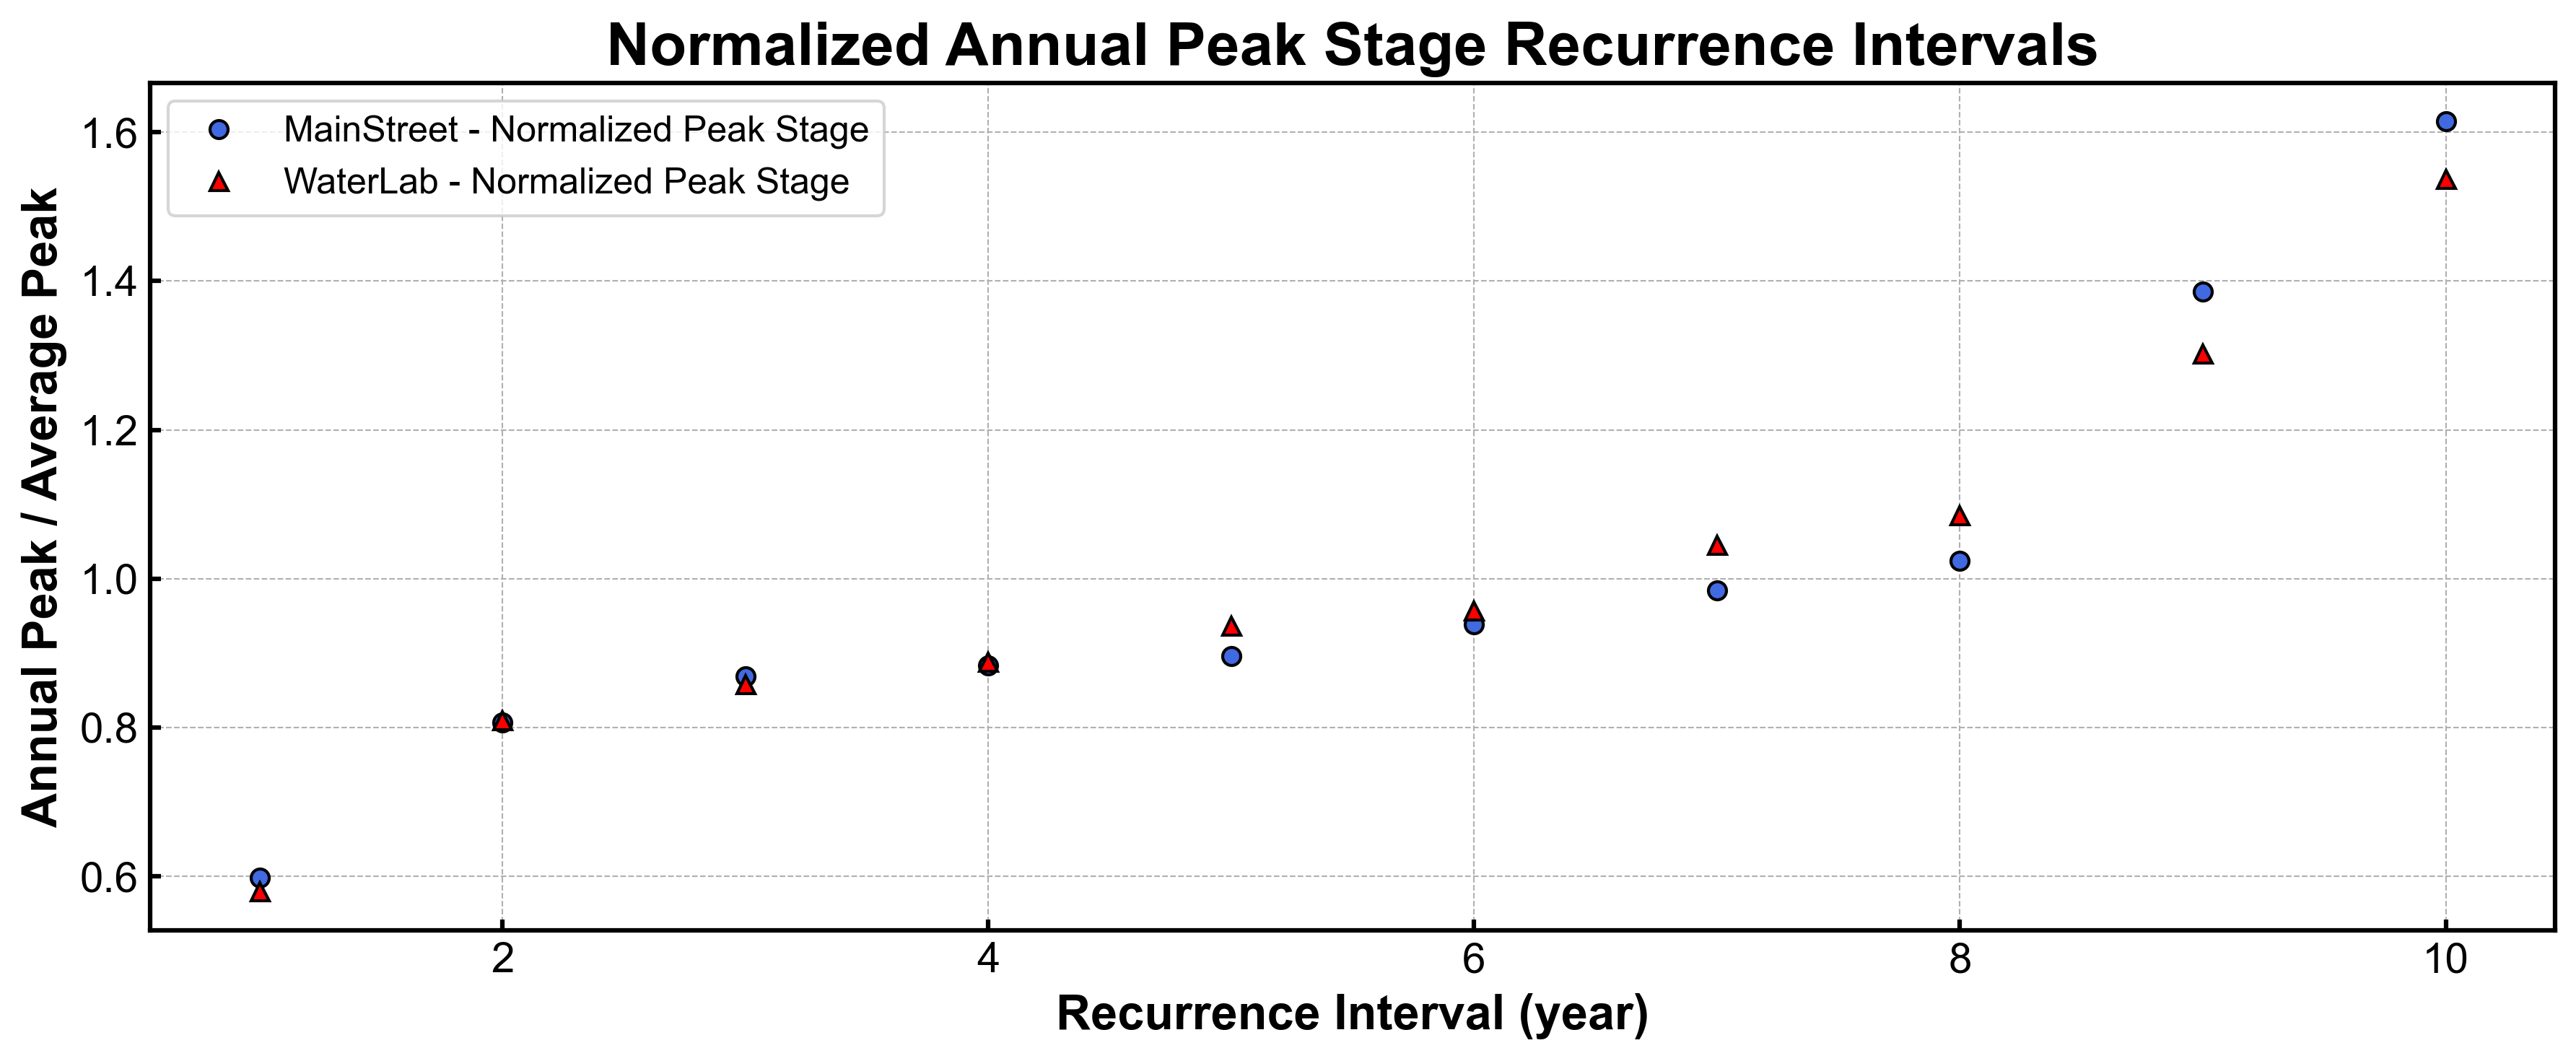

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming recurrence, xr_cdf, MS1_peak, TG1_peak, WL1_peak functions/variables are defined

# Set figure size to match code 2 style
plt.figure(figsize=(12, 5), dpi=300)

# Create a subplot
ax4 = plt.subplot()

# Plotting with specific markers, matching colors, and including labels for clarity
ax4.plot(recurrence(MS2_peak), xr_cdf(MS2_peak) / np.mean(MS2_peak), 'o', mfc='royalblue', mec='k', label='MainStreet - Normalized Peak Stage')  # Circle marker for MS1
ax4.plot(recurrence(WL2_peak), xr_cdf(WL2_peak) / np.mean(WL2_peak), '^', mfc='red', mec='k', label='WaterLab - Normalized Peak Stage')  # Triangle marker for WL1

# Labeling and Styling to match code 2
ax4.set_xlabel('Recurrence Interval (year)', fontweight= 'bold', fontsize=16)
ax4.set_ylabel('Annual Peak / Average Peak', fontweight= 'bold', fontsize=16)
ax4.tick_params(axis='both', which='both', labelsize=14, direction='in', width=1.5, pad=4)
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjusting spines for visibility
for spine in ['top', 'right', 'left', 'bottom']:
    ax4.spines[spine].set_linewidth(1.5)

# Legends and Title
ax4.legend(loc='upper left', fontsize=12)
plt.title('Normalized Annual Peak Stage Recurrence Intervals', fontweight= 'bold', fontsize=20)

# Ensure layout is tight so everything fits without overlap
plt.tight_layout()

# Save the figure with high resolution
#plt.savefig('7.2. Normalized Annual Peak Stage Recurrence Intervals.png', dpi=300)

# Display the plot
plt.show()

# 8. Coefficient of determination (R2)

In [107]:
print(len(df_MS1), len(df_MS2))
print(len(df_WL1), len(df_WL2))

335942 335942
336466 336466


In [108]:
from sklearn.metrics import r2_score



In [109]:
# Merge the datasets for Water Lab
df_merged_WL = pd.merge(df_WL1, df_WL2, on='LocalDateTime', how='inner')
df_reduced_WL = df_merged_WL[['Discharge_cms', 'Stage']]
df_reduced_WL = df_reduced_WL.dropna(subset=['Discharge_cms', 'Stage'])

# Fit the linear regression model for Water Lab
model_WL = LinearRegression()
X_WL = df_reduced_WL[['Discharge_cms']]
y_WL = df_reduced_WL['Stage']
model_WL.fit(X_WL, y_WL)
predictions_WL = model_WL.predict(X_WL)
r_squared_WL = r2_score(y_WL, predictions_WL)

# Merge the datasets for MS
df_merged_MS = pd.merge(df_MS1, df_MS2, on='LocalDateTime', how='inner')
df_reduced_MS = df_merged_MS[['Discharge_cms', 'Stage']]
df_reduced_MS = df_reduced_MS.dropna(subset=['Discharge_cms', 'Stage'])

# Fit the linear regression model for MS
model_MS = LinearRegression()
X_MS = df_reduced_MS[['Discharge_cms']]
y_MS = df_reduced_MS['Stage']
model_MS.fit(X_MS, y_MS)
predictions_MS = model_MS.predict(X_MS)
r_squared_MS = r2_score(y_MS, predictions_MS)

# Create a summary DataFrame to display the results
results_df = pd.DataFrame({
    "Location": ["Water Lab (WL)", "MainStreet"],
    "R^2 Value": [r_squared_WL, r_squared_MS]
})

print(results_df)


         Location  R^2 Value
0  Water Lab (WL)   0.924680
1      MainStreet   0.856302


# 9. Autocorrelation

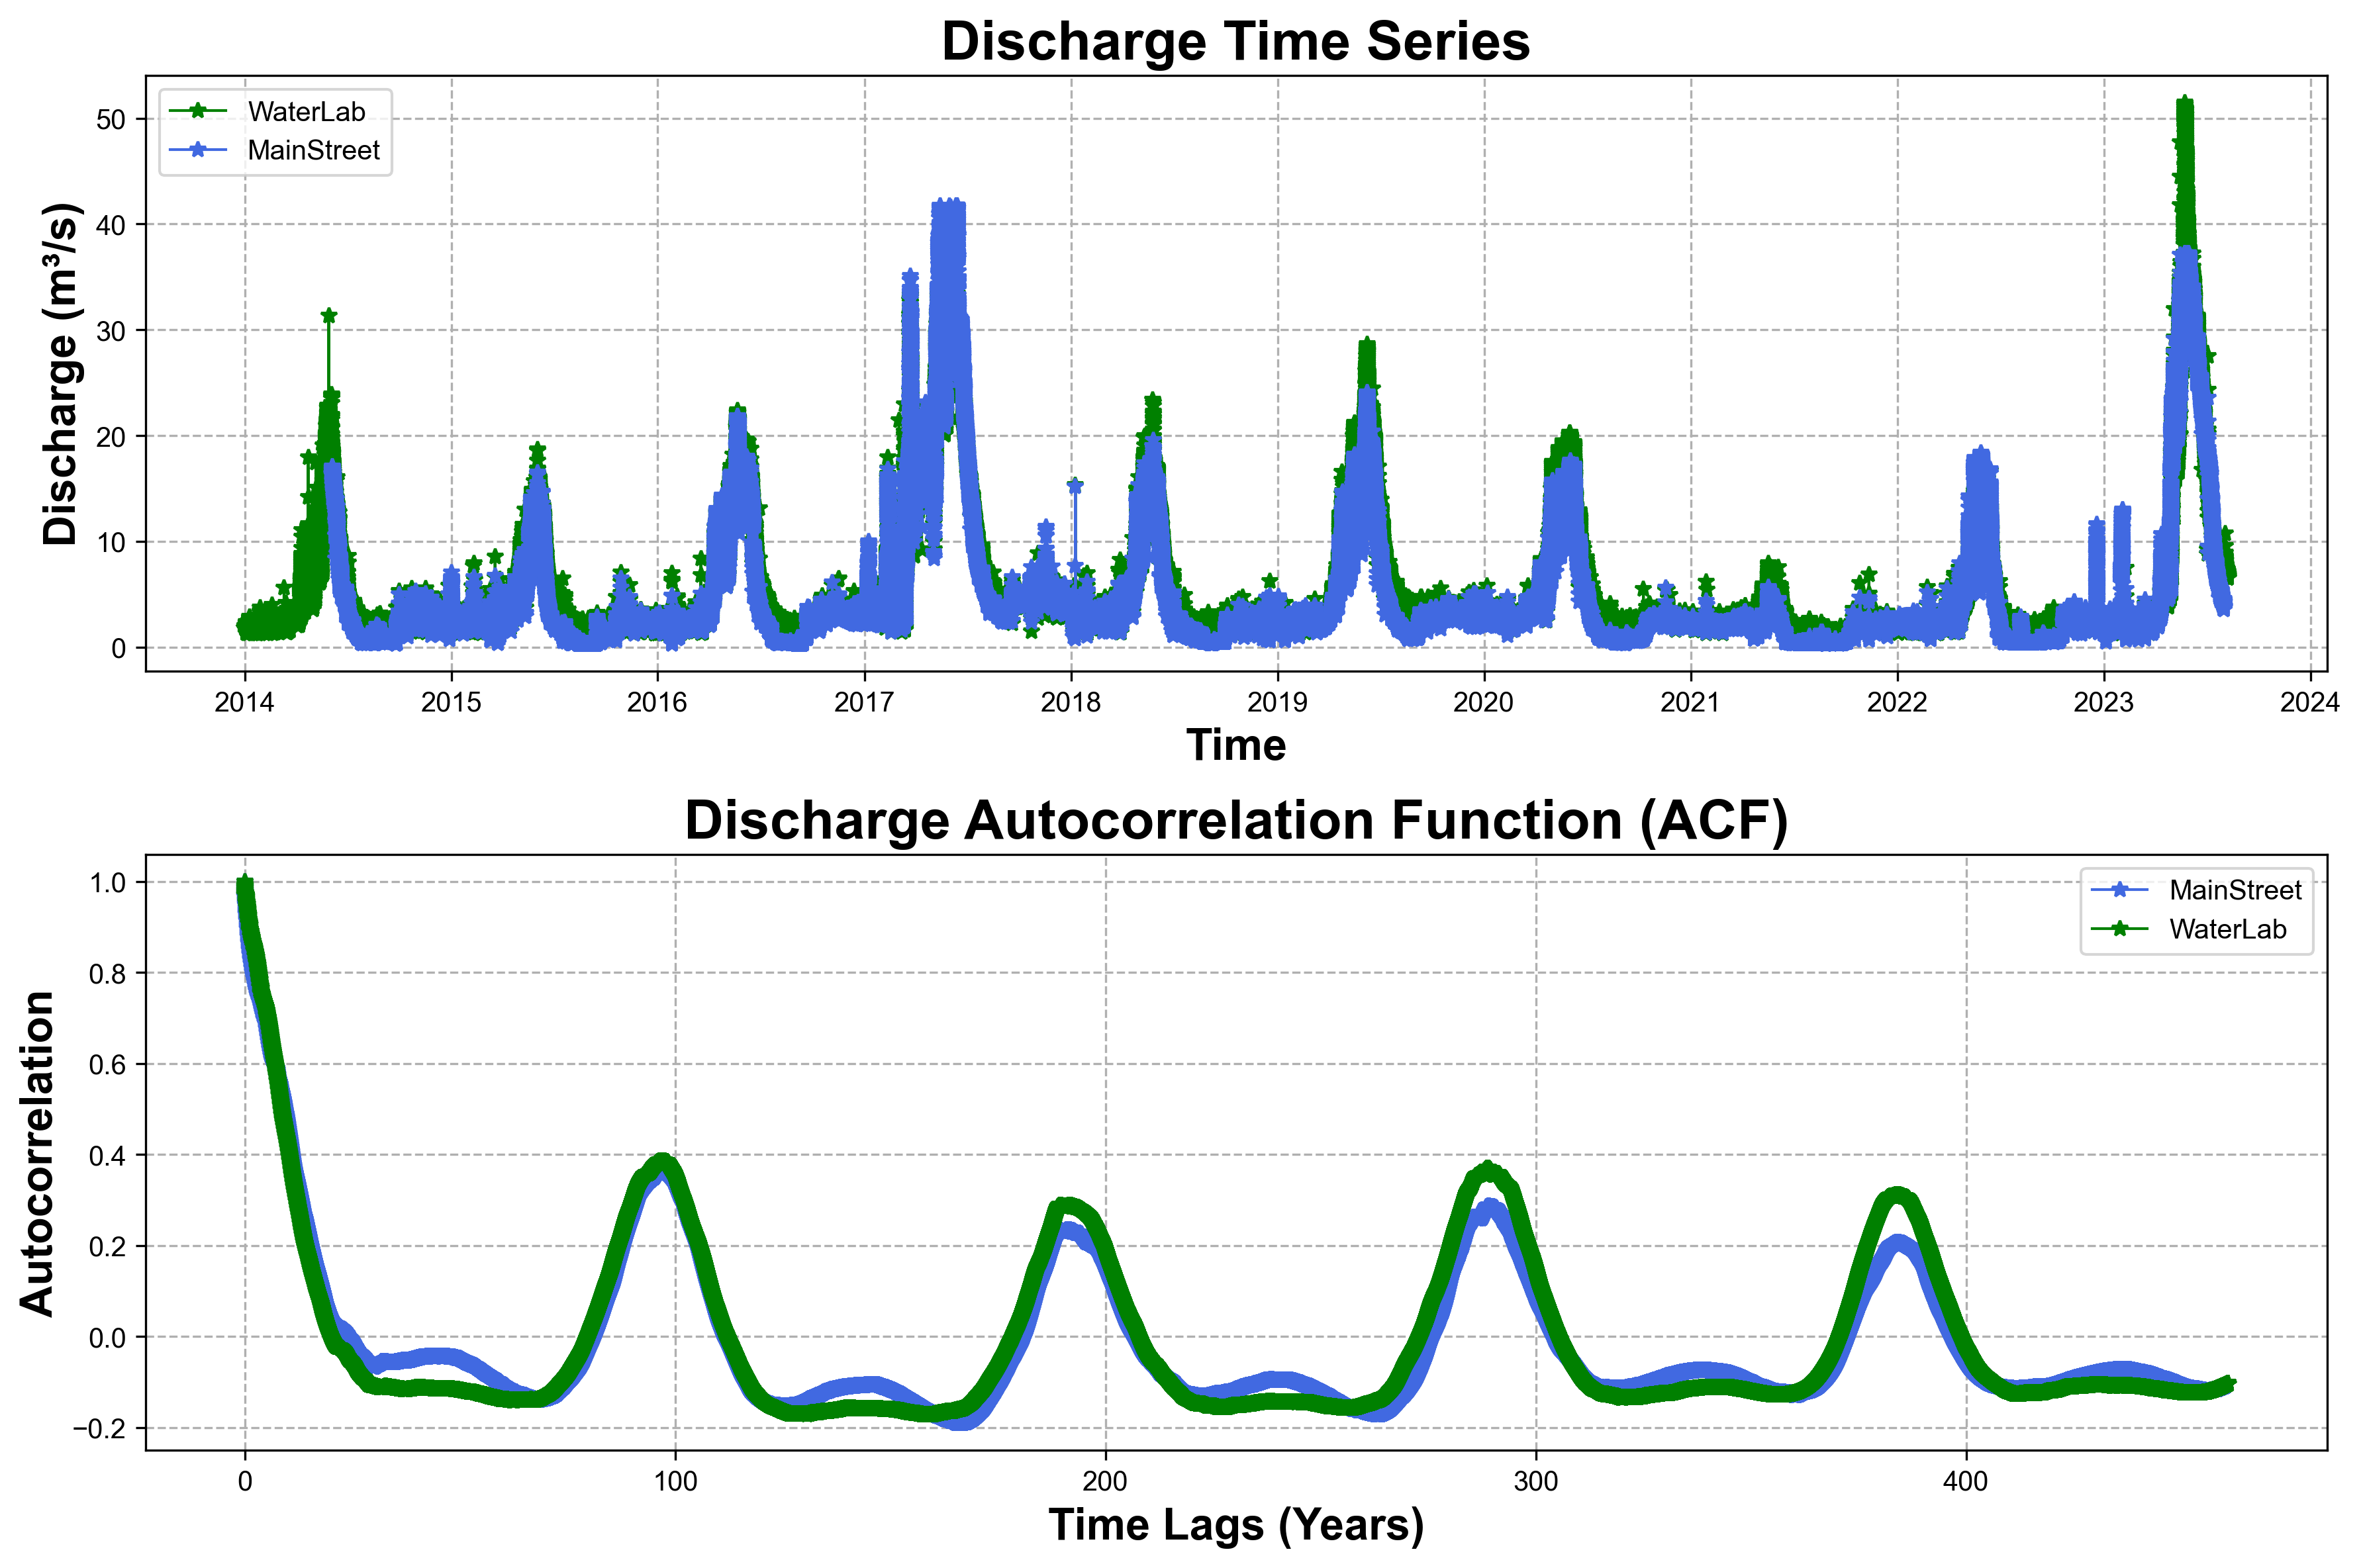

In [110]:
# Discharge

# Mainstreet 
# Using 'missing='conservative'' to handle missing data by omitting NaNs
acf_result_MS = sm.tsa.acf(df_MS1.Discharge_cms, nlags=int(len(df_MS1)/2), fft=True, missing='conservative')
# Generate a sequence of lag values in years for the ACF plot
lags_in_years_MS = np.arange(len(acf_result_MS)) / 365

# WaterLab
# Using 'missing='conservative'' to handle missing data by omitting NaNs
acf_result_WL = sm.tsa.acf(df_WL1.Discharge_cms, nlags=int(len(df_WL1)/2), fft=True, missing='conservative')
# Generate a sequence of lag values in years for the ACF plot
lags_in_years_WL = np.arange(len(acf_result_WL)) / 365


# Creating a figure with two subplots (vertical layout)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), dpi=300)
# Plotting
ax1.plot(df_WL1.Discharge_cms, '-', color='green', label='WaterLab', linewidth=1, marker='*')
ax1.plot(df_MS1.Discharge_cms, '-', color='royalblue', label='MainStreet', linewidth=1, marker='*')
ax1.set_title('Discharge Time Series' , fontweight= 'bold', fontsize=20)
ax1.set_xlabel('Time', fontweight= 'bold', fontsize=16)
ax1.set_ylabel('Discharge (m³/s)', fontweight= 'bold', fontsize=16)
ax1.legend (loc='upper left')
ax1.grid(True, linestyle='--')


# Autocorrelation Function (ACF) Plot
#ax2.plot(lags_in_years_MS, acf_result_MS, linestyle='-',  marker='.', color='green')
ax2.plot(lags_in_years_MS, acf_result_MS, linestyle='-', color='royalblue', label='MainStreet', linewidth=1, marker='*')
ax2.plot(lags_in_years_WL, acf_result_WL, linestyle='-', color='green', label='WaterLab', linewidth=1, marker='*')
ax2.set_title('Discharge Autocorrelation Function (ACF)', fontweight= 'bold', fontsize=20)
ax2.set_xlabel('Time Lags (Years)', fontweight= 'bold', fontsize=16)
ax2.set_ylabel('Autocorrelation', fontweight= 'bold', fontsize=16)
ax2.legend (loc='upper right')
ax2.grid(True, linestyle='--')


plt.tight_layout()  # Adjust layout to prevent overlap


#plt.savefig('9.1. Discharge Autocorrelation Function (ACF) .png', dpi=300)


plt.show()  # Display the plots


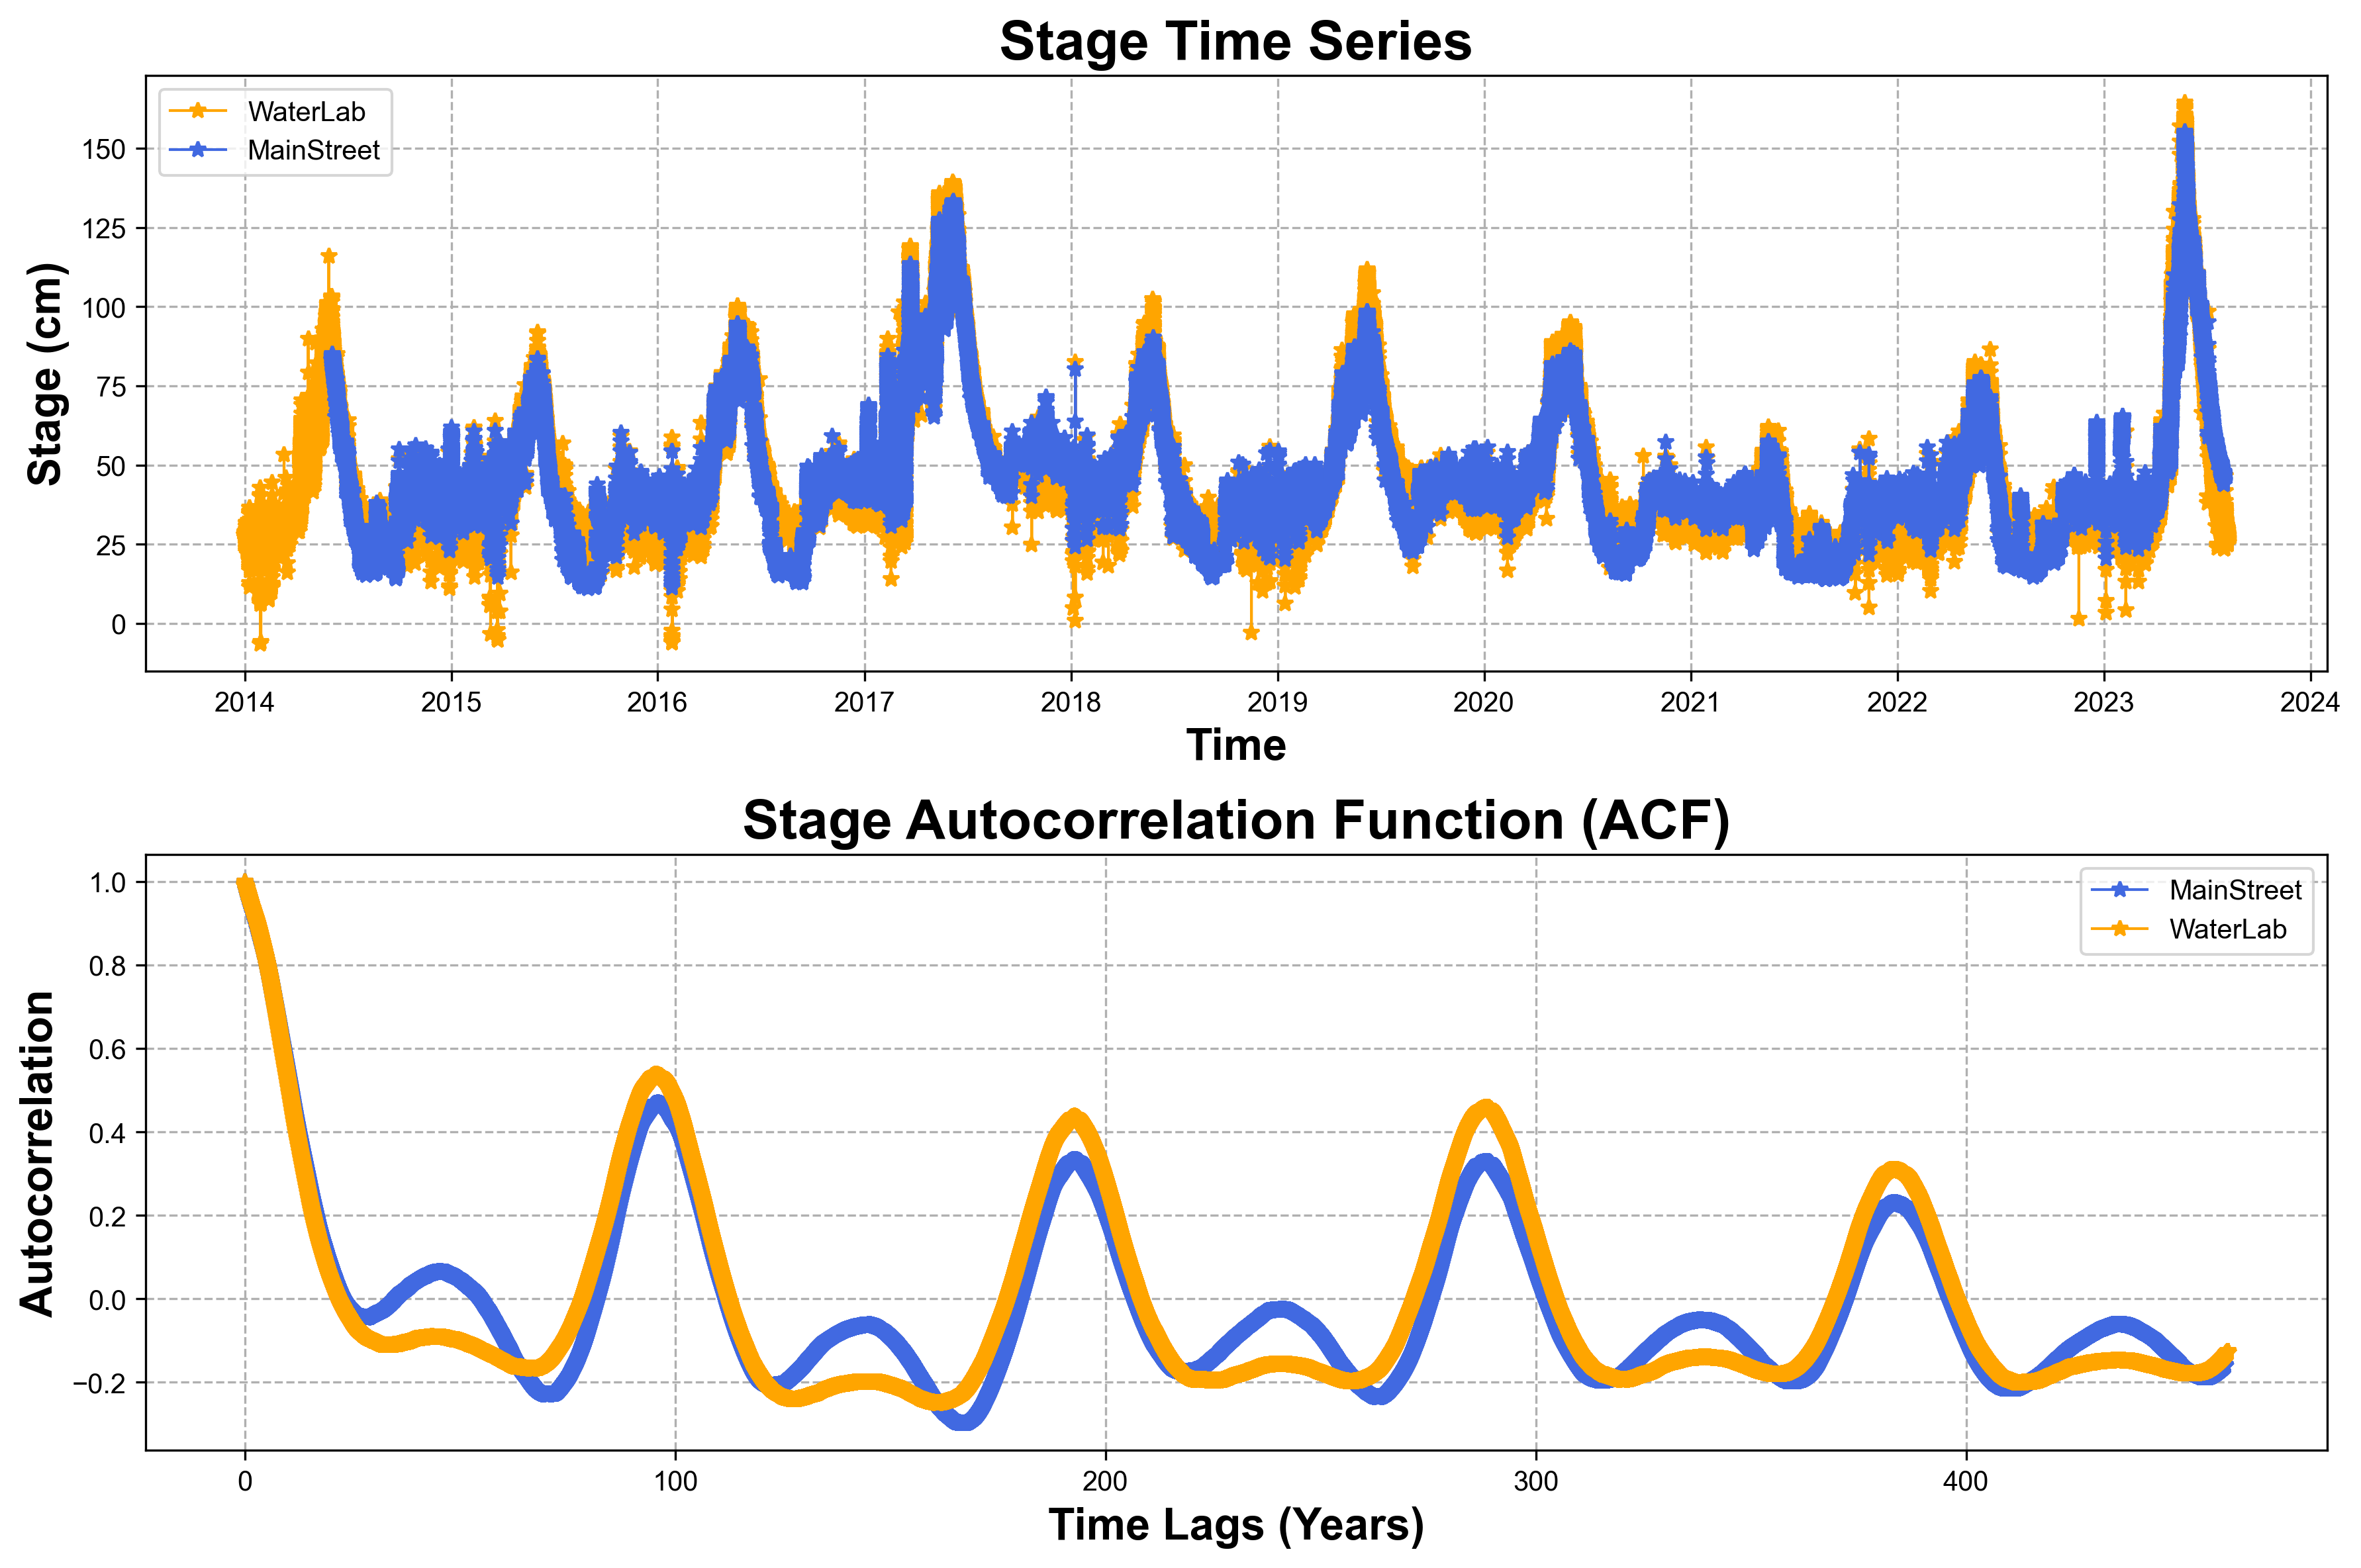

In [111]:
# Stage

# Mainstreet 
# Using 'missing='conservative'' to handle missing data by omitting NaNs
acf_result_MS = sm.tsa.acf(df_MS2.Stage, nlags=int(len(df_MS2)/2), fft=True, missing='conservative')
# Generate a sequence of lag values in years for the ACF plot
lags_in_years_MS = np.arange(len(acf_result_MS)) / 365

# WaterLab
# Using 'missing='conservative'' to handle missing data by omitting NaNs
acf_result_WL = sm.tsa.acf(df_WL2.Stage, nlags=int(len(df_WL2)/2), fft=True, missing='conservative')
# Generate a sequence of lag values in years for the ACF plot
lags_in_years_WL = np.arange(len(acf_result_WL)) / 365


# Creating a figure with two subplots (vertical layout)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), dpi=300)
# Plotting
ax1.plot(df_WL2.Stage, '-', color='orange', label='WaterLab', linewidth=1, marker='*')
ax1.plot(df_MS2.Stage, '-', color='royalblue', label='MainStreet', linewidth=1, marker='*')
ax1.set_title('Stage Time Series', fontweight= 'bold', fontsize=20)
ax1.set_xlabel('Time', fontweight= 'bold', fontsize=16)
ax1.set_ylabel('Stage (cm)', fontweight= 'bold', fontsize=16)
ax1.legend (loc='upper left')
ax1.grid(True, linestyle='--')


# Autocorrelation Function (ACF) Plot
#ax2.plot(lags_in_years_MS, acf_result_MS, linestyle='-',  marker='.', color='green')
ax2.plot(lags_in_years_MS, acf_result_MS, linestyle='-', color='royalblue', label='MainStreet', linewidth=1, marker='*')
ax2.plot(lags_in_years_WL, acf_result_WL, linestyle='-', color='orange', label='WaterLab', linewidth=1, marker='*')
ax2.set_title('Stage Autocorrelation Function (ACF)', fontweight= 'bold', fontsize=20)
ax2.set_xlabel('Time Lags (Years)', fontweight= 'bold', fontsize=16)
ax2.set_ylabel('Autocorrelation', fontweight= 'bold', fontsize=16)
ax2.legend (loc='upper right')
ax2.grid(True, linestyle='--')


plt.tight_layout()  # Adjust layout to prevent overlap


#plt.savefig('9.2. Stage Autocorrelation Function (ACF) .png', dpi=300)


plt.show()  # Display the plots


# 10. Cross-Correlation

In [112]:
# Discharge

df_combined = df_WL1.merge(df_MS1,how='inner',left_index=True,right_index=True)
df_combined = df_combined.interpolate()
df_combined = df_combined.fillna(0)
df_combined = df_combined.dropna()
#df_combined.head()

/var/folders/xh/6f0lgvxn3z39lslpv0q32r0h0000gn/T/ipykernel_97802/2567901309.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_combined = df_combined.interpolate()


In [113]:
X = df_combined.Discharge_cms_x.values ##x variable hydograph 1.
Y = df_combined.Discharge_cms_y.values ##y variable
acf_result = sm.tsa.stattools.ccf(Y,X,adjusted=False) #statsmodels cross correlation function.
lags_in_years = np.arange(len(acf_result))/365 #x vector for plotting

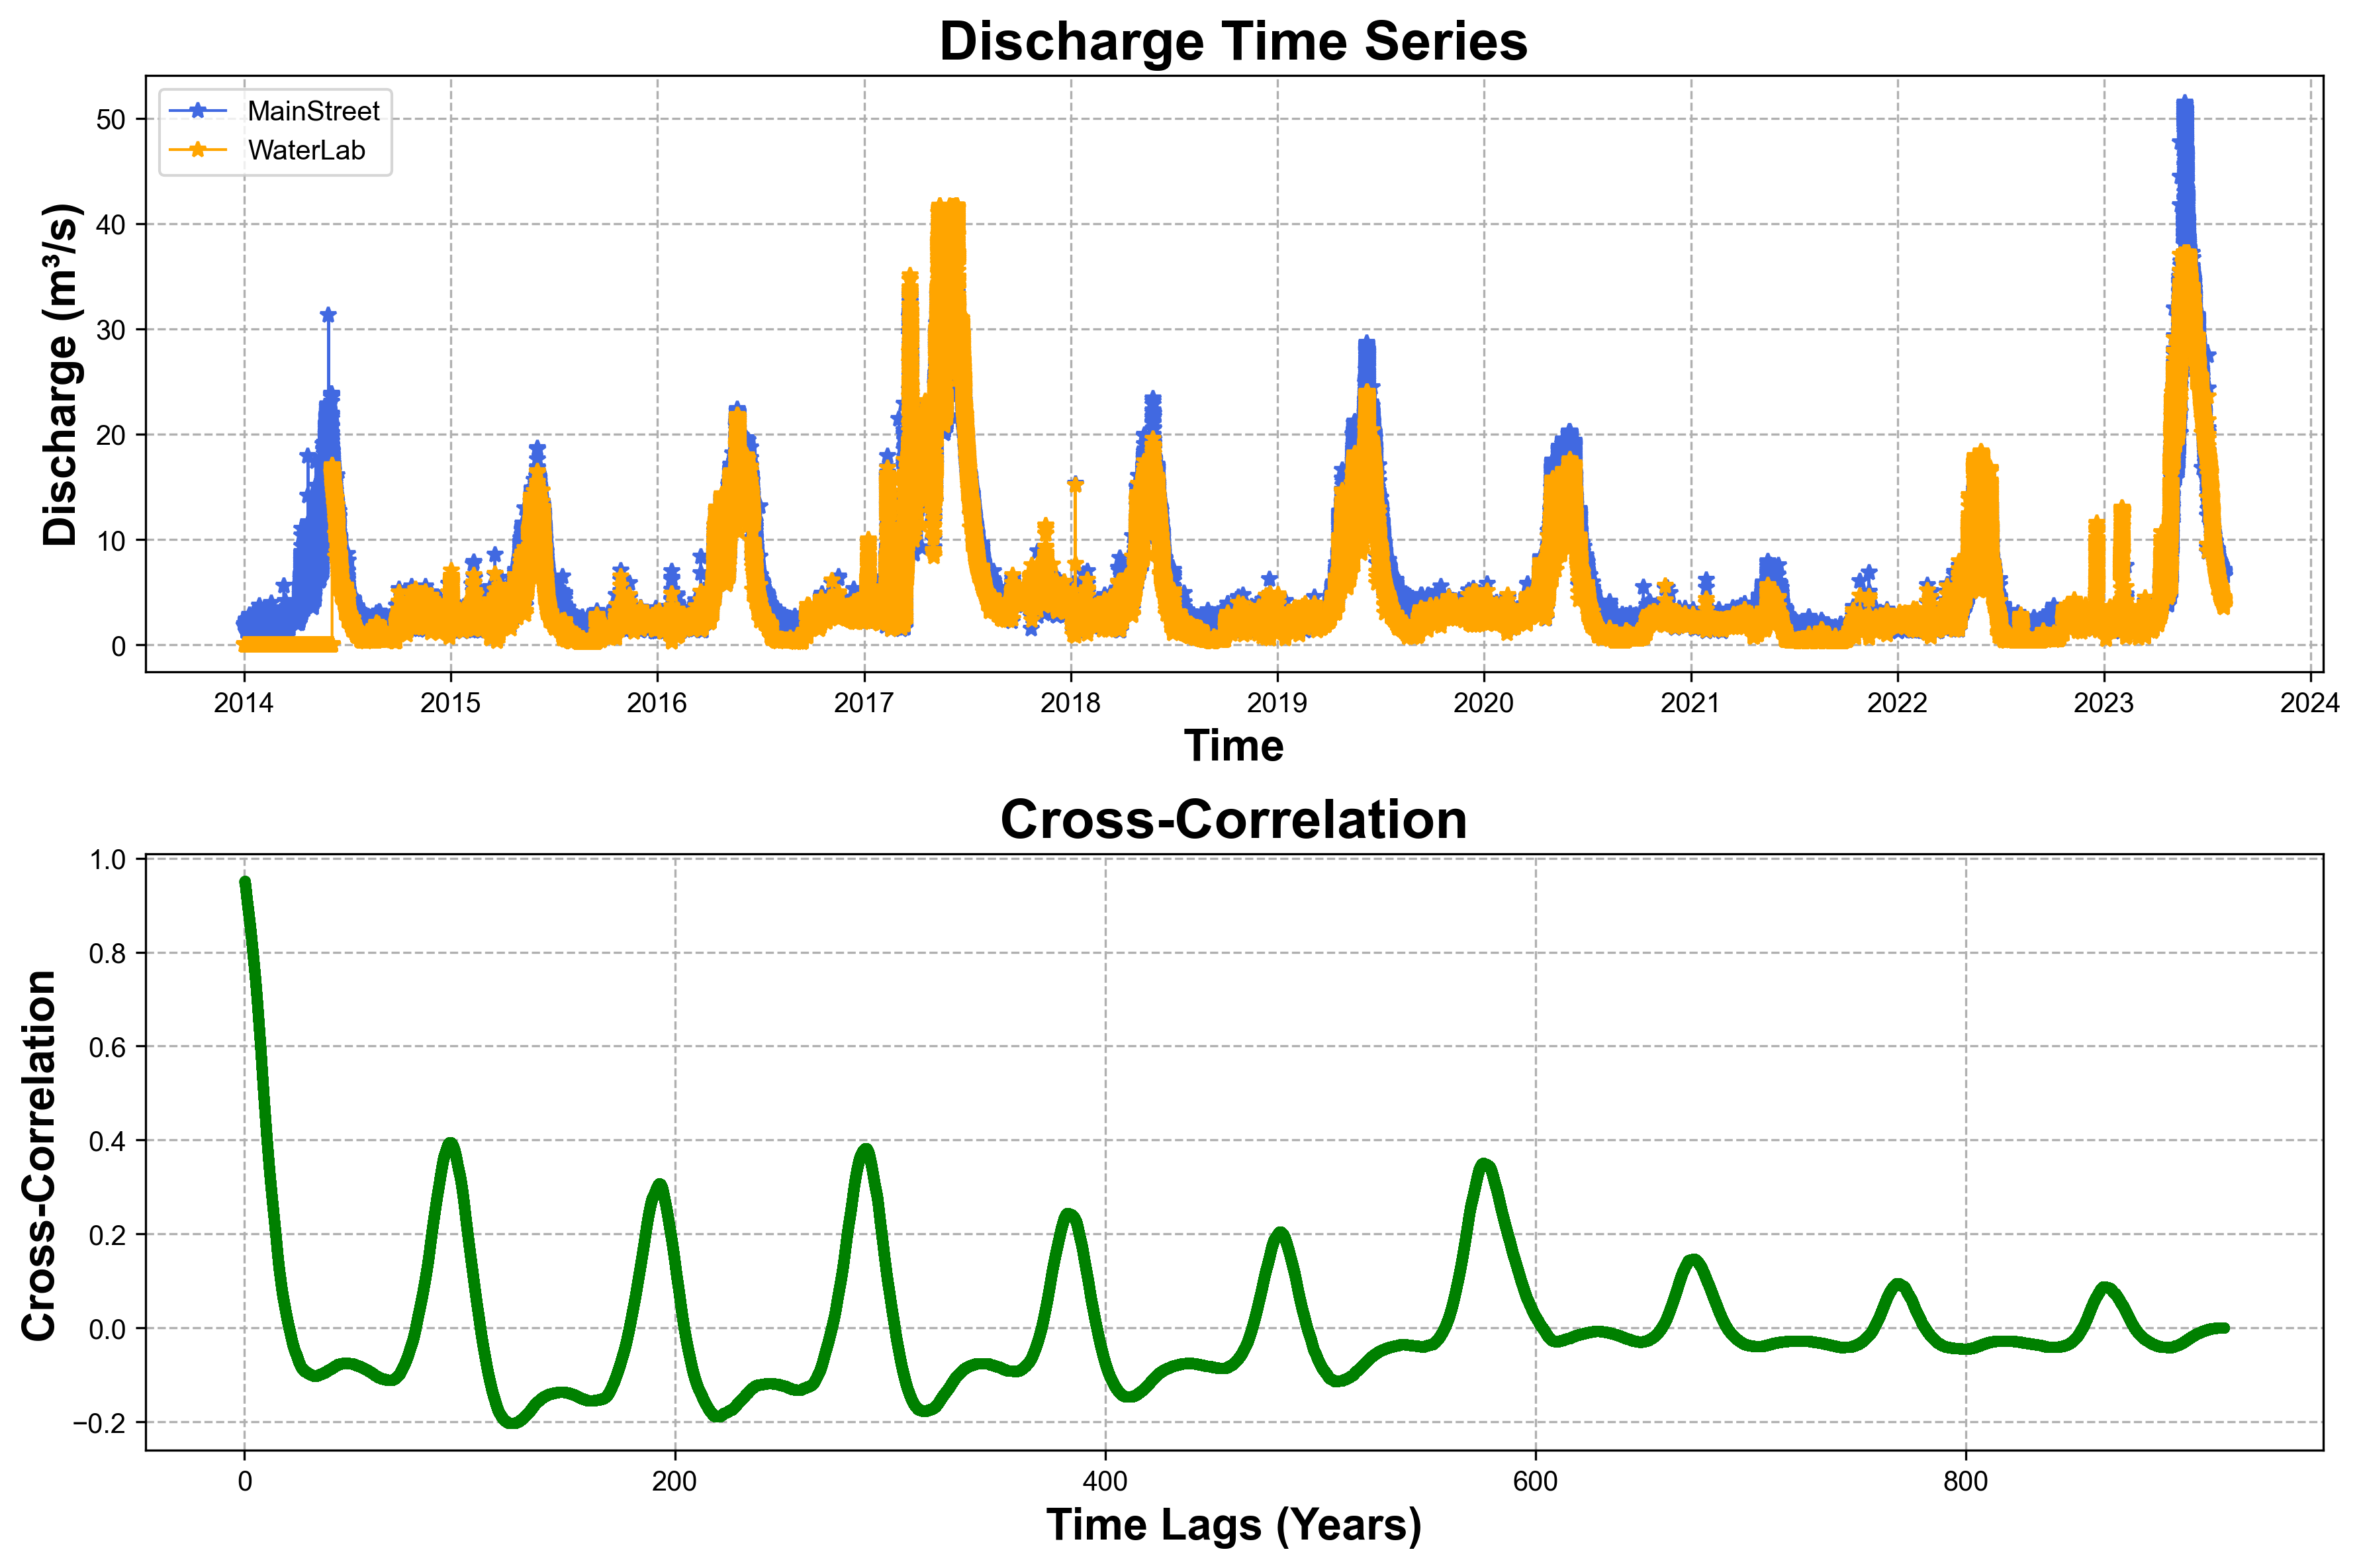

In [114]:
# Creating a figure with two subplots (vertical layout)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), dpi=300)

# Time Series Plot

#ax1.plot(df_WL2.Stage, '-', color='orange', label='WaterLab', linewidth=1, marker='*')
#ax1.plot(df_MS2.Stage, '-', color='royalblue', label='MainStreet', linewidth=1, marker='*')

ax1.plot(df_combined.index, df_combined.Discharge_cms_x, color='royalblue', linestyle='-', label='MainStreet', linewidth=1, marker='*')
ax1.plot(df_combined.index, df_combined.Discharge_cms_y, color='orange', linestyle='-', label='WaterLab', linewidth=1, marker='*')

ax1.set_title('Discharge Time Series', fontweight= 'bold', fontsize=20)
ax1.set_xlabel('Time', fontweight= 'bold', fontsize=16)
ax1.set_ylabel('Discharge (m³/s)', fontweight= 'bold', fontsize=16)
ax1.legend (loc='upper left')
ax1.grid(True, linestyle='--')

# Autocorrelation Function (ACF) Plot
ax2.plot(lags_in_years, acf_result, linestyle='-',  marker='.', color='green')
ax2.set_title('Cross-Correlation', fontweight= 'bold', fontsize=20)
ax2.set_xlabel('Time Lags (Years)', fontweight= 'bold', fontsize=16)
ax2.set_ylabel('Cross-Correlation', fontweight= 'bold', fontsize=16)
#ax2.legend (loc='upper right')
ax2.grid(True, linestyle='--')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('10.1. Discharge Time Series with Cross correlation .png', dpi=300)
plt.show()  # Display the plots

In [115]:
# Stage

df_combined = df_WL2.merge(df_MS2,how='inner',left_index=True,right_index=True)
df_combined = df_combined.interpolate()
df_combined = df_combined.fillna(0)
df_combined = df_combined.dropna()
#df_combined.head()

/var/folders/xh/6f0lgvxn3z39lslpv0q32r0h0000gn/T/ipykernel_97802/2396594913.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_combined = df_combined.interpolate()


In [116]:
X = df_combined.Stage_x.values ##x variable hydograph 1.
Y = df_combined.Stage_y.values ##y variable
acf_result = sm.tsa.stattools.ccf(Y,X,adjusted=False) #statsmodels cross correlation function.
lags_in_years = np.arange(len(acf_result))/365 #x vector for plotting

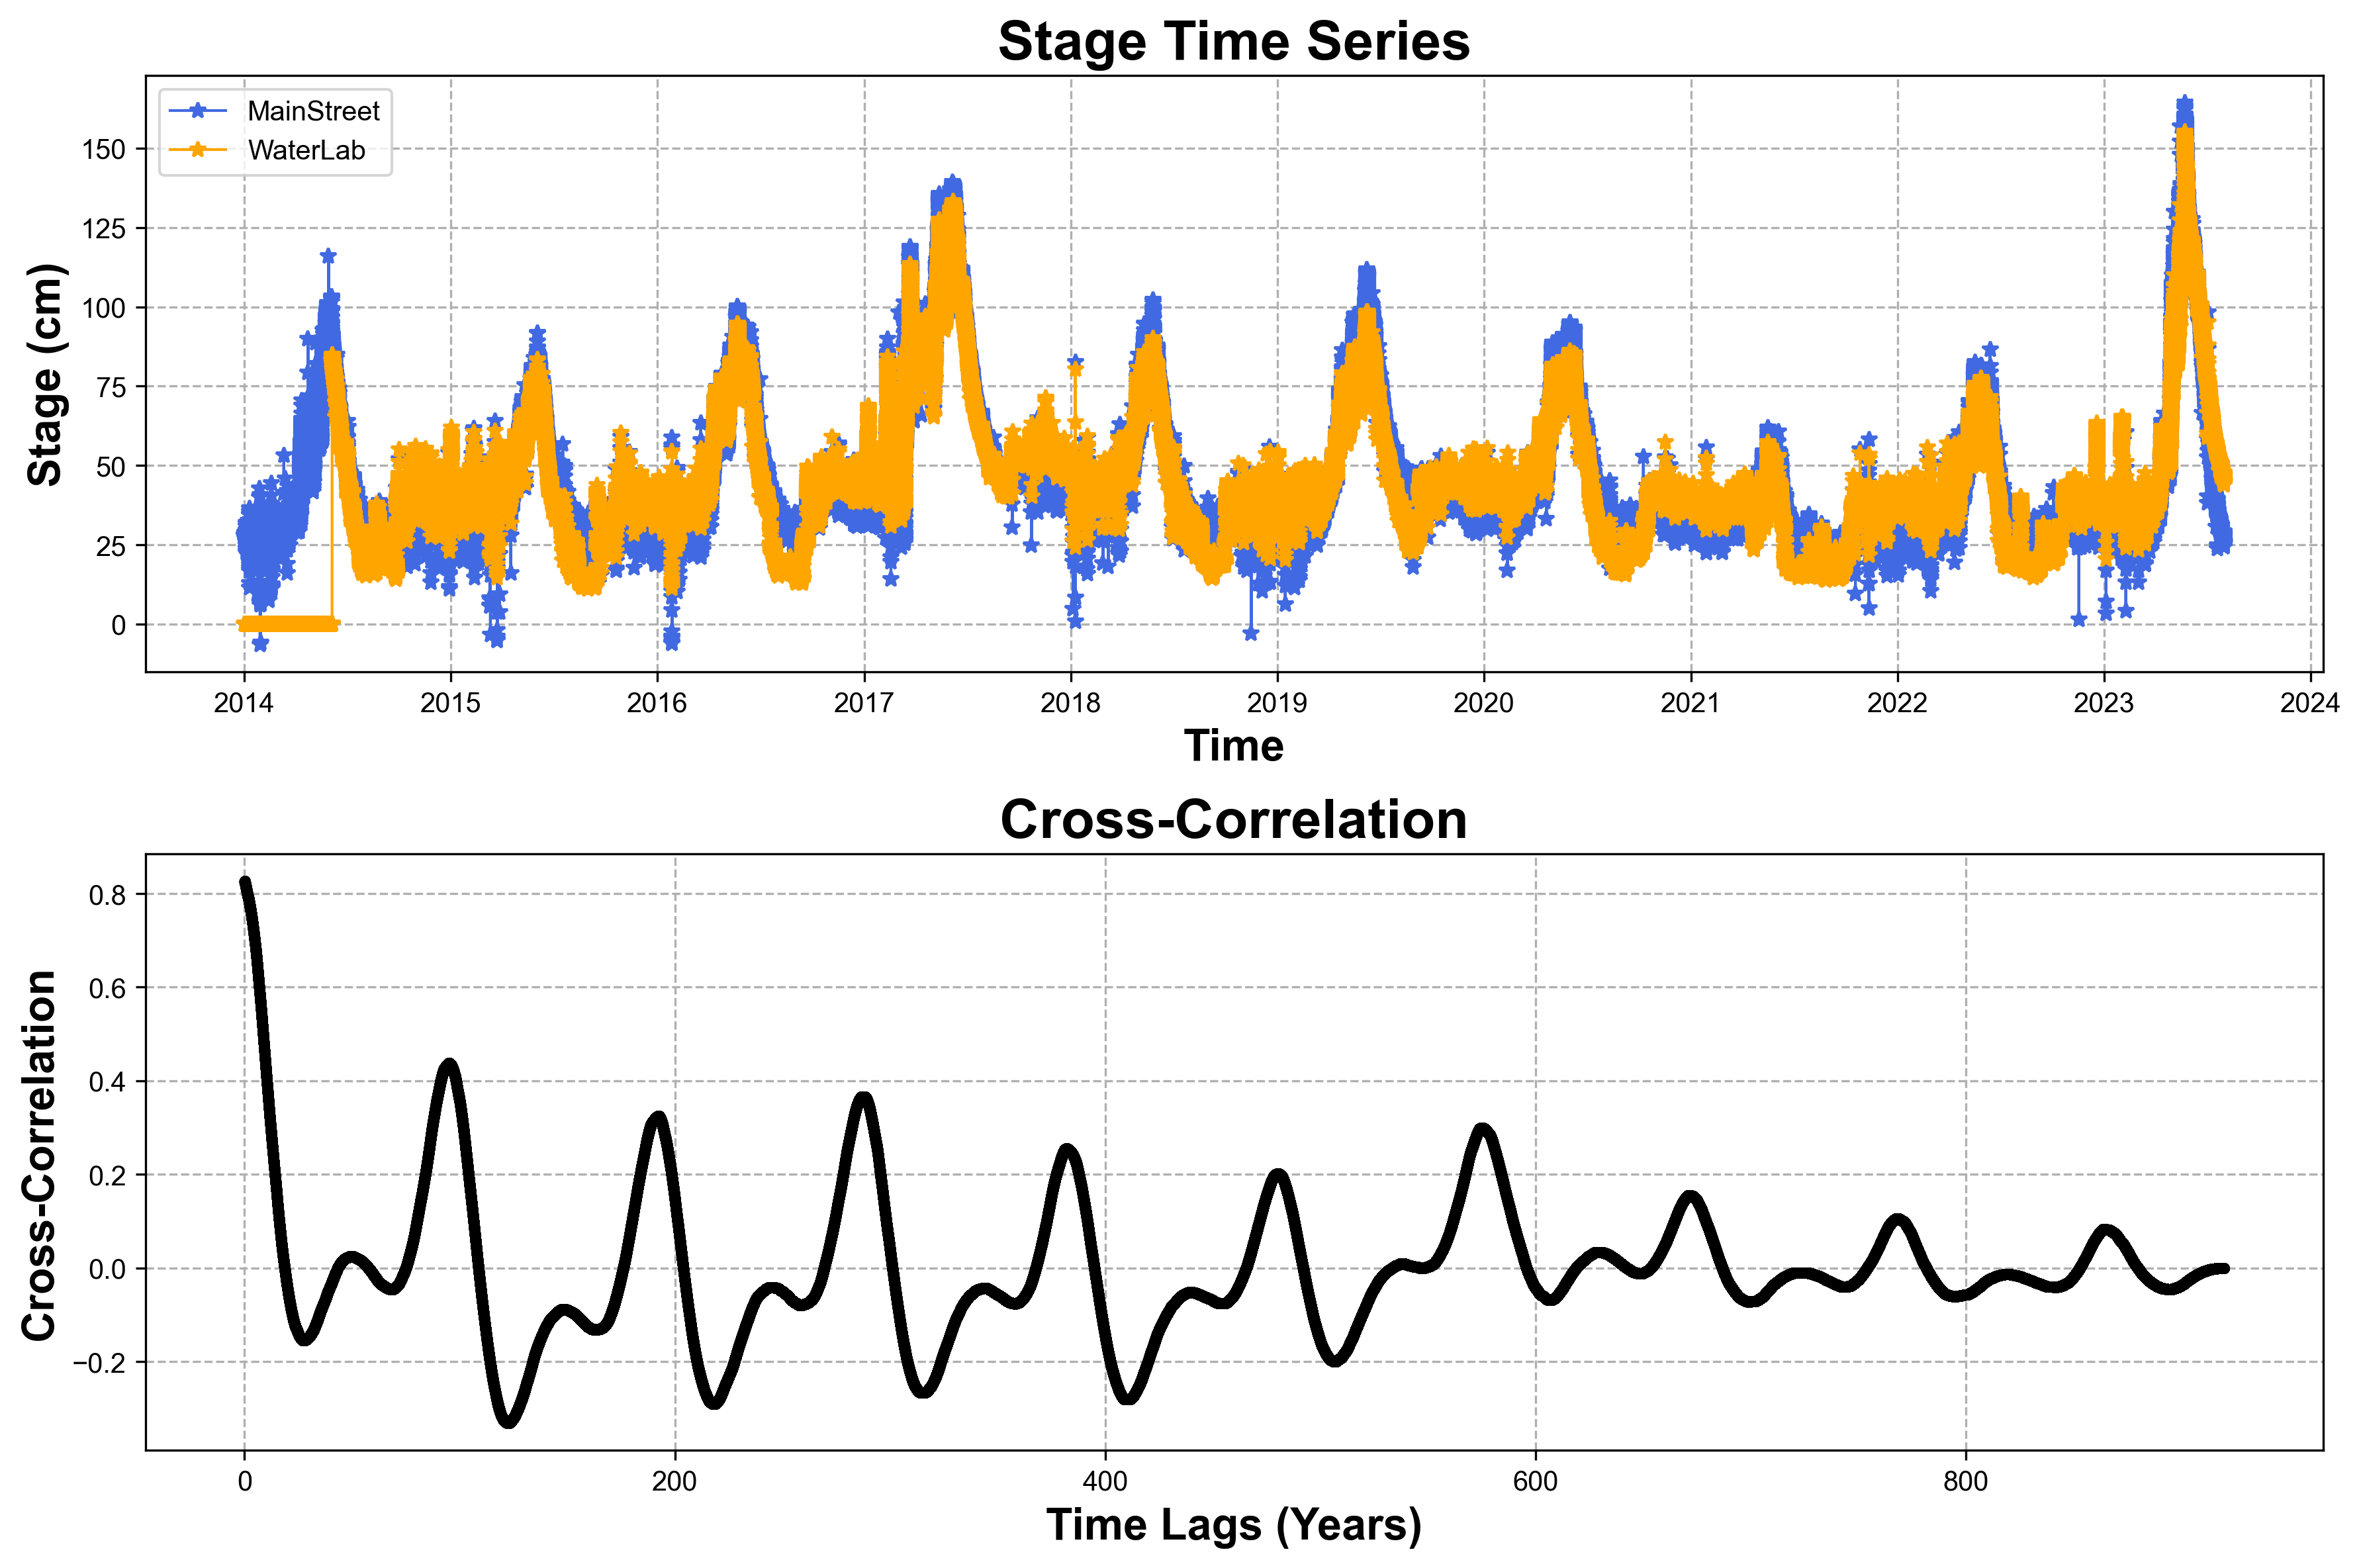

In [117]:
# Creating a figure with two subplots (vertical layout)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), dpi=300)

# Time Series Plot
ax1.plot(df_combined.index, df_combined.Stage_x, color='royalblue', linestyle='-', label='MainStreet', linewidth=1, marker='*')
ax1.plot(df_combined.index, df_combined.Stage_y, color='orange', linestyle='-', label='WaterLab', linewidth=1, marker='*')

ax1.set_title('Stage Time Series', fontweight= 'bold', fontsize=20)
ax1.set_xlabel('Time', fontweight= 'bold', fontsize=16)
ax1.set_ylabel('Stage (cm)', fontweight= 'bold', fontsize=16)
ax1.legend (loc='upper left')
ax1.grid(True, linestyle='--')

# Autocorrelation Function (ACF) Plot
ax2.plot(lags_in_years, acf_result, linestyle='-',  marker='.', color='black')
ax2.set_title('Cross-Correlation', fontweight= 'bold', fontsize=20)
ax2.set_xlabel('Time Lags (Years)', fontweight= 'bold', fontsize=16)
ax2.set_ylabel('Cross-Correlation', fontweight= 'bold', fontsize=16)
#ax2.legend (loc='upper right')
ax2.grid(True, linestyle='--')

plt.tight_layout()  # Adjust layout to prevent overlap
#plt.savefig('10.2. Stage Time Series with Cross correlation .png', dpi=300)
plt.show()  # Display the plots